# Quantification of shape during growth of gemmae

## Documentation and Imports


Created on 01-04-2021

Author: Valentin Laplaud

This code is performing measurements on the gemma contours computed by 'ShapeParametrisationNB'

This light version has only a few quantification used regularly, the complete version is an archive of all tested quantifications.

In [1]:
## Clean up before script start 

for element in dir():

    if element[0:1] != "_":

        del globals()[element]

import gc
gc.collect()


print('\033[1m' + '\033[4m' + '\nRunning ''ShapeQuantificationNB_Light'' \n' + '\033[0m')

import datetime

# plotting stuff
import matplotlib as mpl
mpl.use('TkAgg')
%matplotlib inline

COLOR = 'white'
COLOR2 = 'black'

mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['axes.edgecolor'] = COLOR

mpl.rcParams["figure.facecolor"] = COLOR2
mpl.rcParams["axes.facecolor"] = COLOR2
mpl.rcParams["savefig.facecolor"] = COLOR2
mpl.rcParams['axes.facecolor'] = COLOR2

import matplotlib.pyplot as plt
import matplotlib.path as mpltPath
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from cycler import cycler
#Default colors
colorcycle = [plt.get_cmap('viridis')(1. * i/10) for i in range(10)]
mpl.rcParams['axes.prop_cycle'] = cycler(color=colorcycle)

# numbers handling
import numpy as np
import pandas as pd




# to hide known warnings
import warnings

# General system functions
import os
import shutil
import sys

import time

# my functions
import sys
sys.path.append(r'd:\Users\laplaud\Desktop\PostDoc\Code\PythonFunctions/')
import VallapFunc as vf

from Main import quantifyShape




Running ShapeQuantificationNB_Light 



## Plot fuctions

### Plot evolution of individual contours in time.

In [2]:
def plotIndiContours(PFig,CD, Expname, **kwargs):
    ## Params
    StackList = np.unique(CD.index)
    
    Plots = False
    
    for key, value in kwargs.items(): 
        if key == 'showplots':
            Plots = value
        else:
            print('Unknown key : ' + key + '. Kwarg ignored.')
    
    if not os.path.exists(PFig + '\\IndividualContours\\'):
        os.mkdir(PFig + '\\IndividualContours\\') # create general folder  
    
    fullP = PFig + '\\IndividualContours\\' + Expname + '\\'
    
    if not os.path.exists(fullP):
            os.mkdir(fullP) # create experiment folder        
            
    for s in StackList:
        
        if not os.path.exists(fullP + '\\' + s + '\\'):
            os.mkdir(fullP + '\\' + s + '\\') # create gemmae folder 
            
        nimg = int(np.max(CD.loc[s, 'Img']))
        
        fig1, ax1 = plt.subplots(dpi=350)
        fig1.suptitle(s + ' contours in time.')
        ax1.set_aspect('equal', adjustable='box')
        ax1.set_xlabel('X (µm)')
        ax1.set_ylabel('Y (µm)')
        
        # plot invisible X,Y extremes to set the figure size
        X = [CD.loc[s,'X'].min(),CD.loc[s,'X'].max()]
        Y = [CD.loc[s,'Y'].min(),CD.loc[s,'Y'].max()]
        ax1.plot(X,Y,color = 'k')
        
        colorcycle = [plt.get_cmap('YlOrBr')(1. * i/nimg) for i in range(nimg)]
        
        for i in range(nimg):

            X = CD.loc[(CD.index == s) & (CD['Img'] == i),'X']  
            Y = CD.loc[(CD.index == s) & (CD['Img'] == i),'Y']

            ax1.plot(X,Y,color = colorcycle[i])
            
            fig1.savefig(fullP  + '\\' + s + '\\' + s + ' - ' + str(i)  + '.png')
            
        
        if Plots:
            plt.show()
        else:
            plt.close(fig1)
        
        
        

### Plot distances to mean contour

In [3]:
def plotMeanDist(PFig,GDs,Expname,colors,Times):
    
    Pfolder = PFig + '\\MeanContoursVariability\\'
    if not os.path.exists(Pfolder):
        os.mkdir(Pfolder) # create general folder  
    ## Evolution in time per experiment
    
    fig00,ax00 = plt.subplots(dpi=250) 
    fig00.suptitle('Distance to mean contours at 20h')
    ax00.set_ylabel('Median distance to mean contour (µm)')
    ax00.set_ylim([1,46])
    
    for j in range(len(Expname)):
        GD = GDs[j]
        
        ## Saving folders
        fullP = Pfolder + Expname[j] + '\\'

        if not os.path.exists(fullP):
                os.mkdir(fullP) # create experiment folder  

        ## Params
        StackList = np.unique(GD.index)

        ## Preping figs
        fig0,ax0 = plt.subplots(dpi=250) 
        fig0.suptitle('Evolution of median distance to mean for ' + Expname[j])
        ax0.set_xlabel('Time after dormancy exit (hours)')
        ax0.set_ylabel('Median distance to mean contour (µm)')
        
        
        fig1,ax1 = plt.subplots(dpi=250) 
        fig1.suptitle('Evolution of median distance to normalized mean for ' + Expname[j])
        ax1.set_xlabel('Time after dormancy exit (hours)')
        ax1.set_ylabel('Median distance to mean contour (norm)')
        
        
        fig2,ax2 = plt.subplots(dpi=250) 
        fig2.suptitle('Evolution of L2 distance to mean for ' + Expname[j])
        ax2.set_xlabel('Time after dormancy exit (hours)')
        ax2.set_ylabel('L2 distance to mean contour (µm)')
        
        
        fig3,ax3 = plt.subplots(dpi=250) 
        fig3.suptitle('Evolution of L2 distance to \nnormalized mean for ' + Expname[j])
        ax3.set_xlabel('Time after dormancy exit (hours)')
        ax3.set_ylabel('L2 distance to mean contour (norm)')
        
        
        fig4,ax4 = plt.subplots(dpi=250) 
        fig4.suptitle('Evolution of median distance to \nmean (not aligned in time) for ' + Expname[j])
        ax4.set_xlabel('Time after experiment start (hours)')
        ax4.set_ylabel('Median distance to mean contour (µm)')
        
        
        fig5,ax5 = plt.subplots(dpi=250) 
        fig5.suptitle('Evolution of median distance to \nnormalized mean (not aligned in time) for ' + Expname[j])
        ax5.set_xlabel('Time after experiment start (hours)')
        ax5.set_ylabel('Median distance to mean contour (norm)')
        
        
        fig6,ax6 = plt.subplots(dpi=250) 
        fig6.suptitle('Evolution of L2 distance to \nmean (not aligned in time) for ' + Expname[j])
        ax6.set_xlabel('Time after experiment start (hours)')
        ax6.set_ylabel('L2 distance to mean contour (µm)')
        
        
        fig7,ax7 = plt.subplots(dpi=250) 
        fig7.suptitle('Evolution of L2 distance to \nnormalized mean (not aligned in time) for ' + Expname[j])
        ax7.set_xlabel('Time after experiment start (hours)')
        ax7.set_ylabel('L2 distance to mean contour (norm)')
        
        
        plotprops = {'color':'white'}
        boxprops = {'color':'white','facecolor':colors[j]}

        grouping = []
        grouping_NotAl = []
        
        fullMedDist = []
        fullMedDistN = []
        fullL2Dist = []
        fullL2DistN = []
        
        fullMedDist_NotAl = []
        fullMedDistN_NotAl = []
        fullL2Dist_NotAl = []
        fullL2DistN_NotAl = []
        
        cnt = 0
        
        ## Main code
        for t in Times:
            
            MedDist = GD.loc[(GD['MeanCimg']==t*2),'MedDist'].values
            MedDistN = GD.loc[(GD['MeanCimg']==t*2),'MedDistNorm'].values
            L2Dist = GD.loc[(GD['MeanCimg']==t*2),'L2Dist'].values
            L2DistN = GD.loc[(GD['MeanCimg']==t*2),'L2DistNorm'].values
            
            fullMedDist = np.append(fullMedDist,MedDist)
            fullMedDistN = np.append(fullMedDistN,MedDistN)
            fullL2Dist = np.append(fullL2Dist,L2Dist)
            fullL2DistN = np.append(fullL2DistN,L2DistN)
            
            MedDist_NotAl = GD.loc[(GD['Img']==t*2),'NotalMedDist'].values
            MedDistN_NotAl = GD.loc[(GD['Img']==t*2),'NotalMedDistNorm'].values
            L2Dist_NotAl = GD.loc[(GD['Img']==t*2),'NotalL2Dist'].values
            L2DistN_NotAl = GD.loc[(GD['Img']==t*2),'NotalL2DistNorm'].values
            
            fullMedDist_NotAl = np.append(fullMedDist_NotAl,MedDist_NotAl)
            fullMedDistN_NotAl = np.append(fullMedDistN_NotAl,MedDistN_NotAl)
            fullL2Dist_NotAl = np.append(fullL2Dist_NotAl,L2Dist_NotAl)
            fullL2DistN_NotAl = np.append(fullL2DistN_NotAl,L2DistN_NotAl)
            
            grouping = np.append(grouping,np.ones(len(MedDist))*t)
            grouping_NotAl = np.append(grouping_NotAl,np.ones(len(MedDist_NotAl))*t)

            if t == 20:
                ax00.boxplot(MedDist, positions = [j], patch_artist = True, widths = [0.7],
                            boxprops=boxprops, capprops =plotprops,
                            showfliers = False,whiskerprops=plotprops,medianprops =plotprops)
            
            ax0.boxplot(MedDist, positions = [cnt], patch_artist = True, widths = [0.7],
                        boxprops=boxprops, capprops =plotprops,
                        showfliers = False,whiskerprops=plotprops,medianprops =plotprops)
            
            ax1.boxplot(MedDistN, positions = [cnt], patch_artist = True, widths = [0.7],
                        boxprops=boxprops, capprops =plotprops,
                        showfliers = False,whiskerprops=plotprops,medianprops =plotprops)  

            ax2.boxplot(L2Dist, positions = [cnt], patch_artist = True, widths = [0.7],
                        boxprops=boxprops, capprops =plotprops,
                        showfliers = False,whiskerprops=plotprops,medianprops =plotprops)
            
            ax3.boxplot(L2DistN, positions = [cnt], patch_artist = True, widths = [0.7],
                        boxprops=boxprops, capprops =plotprops,
                        showfliers = False,whiskerprops=plotprops,medianprops =plotprops)  

            
            ax4.boxplot(MedDist_NotAl, positions = [cnt], patch_artist = True, widths = [0.7],
                        boxprops=boxprops, capprops =plotprops,
                        showfliers = False,whiskerprops=plotprops,medianprops =plotprops)
            
            ax5.boxplot(MedDistN_NotAl, positions = [cnt], patch_artist = True, widths = [0.7],
                        boxprops=boxprops, capprops =plotprops,
                        showfliers = False,whiskerprops=plotprops,medianprops =plotprops)  

            ax6.boxplot(L2Dist_NotAl, positions = [cnt], patch_artist = True, widths = [0.7],
                        boxprops=boxprops, capprops =plotprops,
                        showfliers = False,whiskerprops=plotprops,medianprops =plotprops)
            
            ax7.boxplot(L2DistN_NotAl, positions = [cnt], patch_artist = True, widths = [0.7],
                        boxprops=boxprops, capprops =plotprops,
                        showfliers = False,whiskerprops=plotprops,medianprops =plotprops)            
            
            cnt = cnt+1
            
        sns.swarmplot(x=grouping,y=fullMedDist,color = 'lightgray', size=2, ax = ax0)
        ax0.set_xlim(left=-0.7,right=cnt-0.3)
        ax0.set_xticklabels(Times)
        
        sns.swarmplot(x=grouping,y=fullMedDistN,color = 'lightgray', size=2, ax = ax1)
        ax1.set_xlim(left=-0.7,right=cnt-0.3)
        ax1.set_xticklabels(Times)
            
        sns.swarmplot(x=grouping,y=fullL2Dist,color = 'lightgray', size=2, ax = ax2)
        ax2.set_xlim(left=-0.7,right=cnt-0.3)
        ax2.set_xticklabels(Times)
        
        sns.swarmplot(x=grouping,y=fullL2DistN,color = 'lightgray', size=2, ax = ax3)
        ax3.set_xlim(left=-0.7,right=cnt-0.3)
        ax3.set_xticklabels(Times)
            
        sns.swarmplot(x=grouping_NotAl,y=fullMedDist_NotAl,color = 'lightgray', size=2, ax = ax4)
        ax4.set_xlim(left=-0.7,right=cnt-0.3)
        ax4.set_xticklabels(Times)
        
        sns.swarmplot(x=grouping_NotAl,y=fullMedDistN_NotAl,color = 'lightgray', size=2, ax = ax5)
        ax5.set_xlim(left=-0.7,right=cnt-0.3)
        ax5.set_xticklabels(Times)
            
        sns.swarmplot(x=grouping_NotAl,y=fullL2Dist_NotAl,color = 'lightgray', size=2, ax = ax6)
        ax6.set_xlim(left=-0.7,right=cnt-0.3)
        ax6.set_xticklabels(Times)
        
        sns.swarmplot(x=grouping_NotAl,y=fullL2DistN_NotAl,color = 'lightgray', size=2, ax = ax7)
        ax7.set_xlim(left=-0.7,right=cnt-0.3)
        ax7.set_xticklabels(Times)
        
        fig0.savefig(fullP + 'MedDistToMean.png')
        fig1.savefig(fullP + 'MedDistToMeanNorm.png')
        fig2.savefig(fullP + 'L2DistToMean.png')
        fig3.savefig(fullP + 'L2DistToMeanNorm.png')
        
        fig4.savefig(fullP + 'MedDistToMeanNotAl.png')
        fig5.savefig(fullP + 'MedDistToMeanNormNotAl.png')
        fig6.savefig(fullP + 'L2DistToMeanNotAl.png')
        fig7.savefig(fullP + 'L2DistToMeanNormNotAl.png')
    
    ax00.set_xticklabels(Expname)
        
        
     ### Comparison between experiments    
#     if len(GDs)>1:       
#         for t in Times:
#             ## Preping figs
#             fig1,ax1 = plt.subplots(dpi=250) 
#             fig1.suptitle('Median distance to mean ' + str(t) + ' hours after dormancy exit')
            
#             fig2,ax2 = plt.subplots(dpi=250) 
#             fig2.suptitle('Median distance to normalized mean ' + str(t) + ' hours after dormancy exit')

#             MedDist = [None]*len(GDs)
#             MedDistN = [None]*len(GDs)
#             cap = [None]*len(GDs)
#             capN = [None]*len(GDs)
#             grouping = []
#             fullMedDist = []
#             fullMedDistN = []
#             cnt = 0

#             for j in range(len(Expname)):
#                 GD = GDs[j]
#                 plotprops = {'color':'white'}
#                 boxprops = {'color':'white','facecolor':colors[j]}

#                 MedDist[j] = GD.loc[(GD['MeanCimg']==t*2),'MedDist']
#                 MedDistN[j] = GD.loc[(GD['MeanCimg']==t*2),'MedDistNorm']

#                 fullMedDist = np.append(fullMedDist,MedDist[j].values)
#                 fullMedDistN = np.append(fullMedDistN,MedDistN[j].values)
#                 grouping = np.append(grouping,np.ones(len(MedDist[j]))*j)

#                 bp = ax1.boxplot(MedDist[j], positions = [cnt], patch_artist = True, widths = [0.7],
#                             boxprops=boxprops, capprops =plotprops,
#                             showfliers = False,whiskerprops=plotprops,medianprops =plotprops)

#                 bpN = ax2.boxplot(MedDistN[j], positions = [cnt], patch_artist = True, widths = [0.7],
#                             boxprops=boxprops, capprops =plotprops,
#                             showfliers = False,whiskerprops=plotprops,medianprops =plotprops)
#                 cnt = cnt+1

#                 cap[j] = bp['caps'][1].get_yMedDist(orig=True)[0]
#                 capN[j] = bpN['caps'][1].get_yMedDist(orig=True)[0]

#             sns.swarmplot(x=grouping,y=fullMedDist,color = 'lightgray', size=2, ax = ax1)
#             ax1.set_xlim(left=-0.7,right=cnt-0.3)
#             ax1.set_xticklabels(Expname)

#             sns.swarmplot(x=grouping,y=fullMedDistN,color = 'lightgray', size=2, ax = ax2)
#             ax2.set_xlim(left=-0.7,right=cnt-0.3)
#             ax2.set_xticklabels(Expname)

#             step = np.max(cap)*0.125
#             stepN = np.max(capN)*0.125
#             fullstep = 0
#             fullstepN = 0
#             hmax = np.max(cap)
#             hmaxN = np.max(capN)


#             for i in range(len(GDs)-1):
#                 for j in range(i+1,len(GDs)):

#                     fullstep = plotSig(ax1,hmax,step,fullstep,MedDist[i],MedDist[j],i,j)
#                     fullstepN = plotSig(ax2,hmaxN,stepN,fullstepN,MedDistN[i],MedDistN[j],i,j)

#             fig1.savefig(Pfolder + '_'.join(Expname) + '_t=' + str(t) + 'h_MedDistToMean.png')
#             fig2.savefig(Pfolder + '_'.join(Expname) + '_t=' + str(t) + 'h_MedDistToMeanNorm.png')

### Plot distances between mean contours from different experiments

In [4]:
def DistBetwMean(PFig,CDMeans,GDMeans,Expnames, **kwargs):
    N = len(CDMeans)
    
    Pfolder = PFig + '\\MeanContoursDistance\\'
    Pfolder2 = Pfolder + '\\2by2\\'
    
    indiplots = True
    commonplots = True
    
    for key, value in kwargs.items(): 
        if key == 'indiplots':
            indiplots = value
        elif key == 'commonplots':
            commonplots = value
        else:
            print('Unknown key : ' + key + '. Kwarg ignored.')
    
    AllLabels = []
    
    if not os.path.exists(Pfolder):
        os.mkdir(Pfolder) # create general folder  
    if not os.path.exists(Pfolder2):
        os.mkdir(Pfolder2) # create general folder  
    
    if commonplots:
        fig000,ax000 = plt.subplots(dpi=350)
        fig000.suptitle('Median distance between mean contours at 20h')
        ax000.set_ylabel('Distance (µm)')
        ax000.set_ylim([1,46])
        
        fig00,ax00 = plt.subplots(dpi=350)
        fig00.suptitle('Median distance between mean contours')
        ax00.set_xlabel('Time after dormancy exit (hours)')
        ax00.set_ylabel('Distance (µm)')

        fig01,ax01 = plt.subplots(dpi=350)
        fig01.suptitle('Median distance between normalized mean contours')
        ax01.set_xlabel('Time after dormancy exit (hours)')
        ax01.set_ylabel('Distance (norm)')

        fig02,ax02 = plt.subplots(dpi=350)
        fig02.suptitle('Median distance between mean contours (not time aligned)')
        ax02.set_xlabel('Time after dormancy exit (hours)')
        ax02.set_ylabel('Distance (µm)')

        fig03,ax03 = plt.subplots(dpi=350)
        fig03.suptitle('Median distance between normalized mean contours (not time aligned)')
        ax03.set_xlabel('Time after dormancy exit (hours)')
        ax03.set_ylabel('Distance (norm)')

        fig04,ax04 = plt.subplots(dpi=350)
        fig04.suptitle('L2 distance between mean contours')
        ax04.set_xlabel('Time after experiment start (hours)')
        ax04.set_ylabel('Distance (µm)')

        fig05,ax05 = plt.subplots(dpi=350)
        fig05.suptitle('L2 distance between normalized mean contours')
        ax05.set_xlabel('Time after experiment start (hours)')
        ax05.set_ylabel('Distance (norm)')

        fig06,ax06 = plt.subplots(dpi=350)
        fig06.suptitle('L2 distance between mean contours (not time aligned)')
        ax06.set_xlabel('Time after experiment start (hours)')
        ax06.set_ylabel('Distance (µm)')

        fig07,ax07 = plt.subplots(dpi=350)
        fig07.suptitle('L2 distance between normalized mean contours (not time aligned)')
        ax07.set_xlabel('Time after experiment start (hours)')
        ax07.set_ylabel('Distance (norm)')
    
    for i in range(0,N-1):
        for j in range(i+1,N):
            
            label = Expnames[i] + ' & ' + Expnames[j]
            AllLabels = np.append(AllLabels,label)
            
            if indiplots:
                fig0,ax0 = plt.subplots(nrows =2, dpi=350)
                fig0.suptitle('Median distance between mean contours from \n' + label)
                ax0[1].set_xlabel('Time after dormancy exit (hours)')
                ax0[1].set_ylabel('Number of avg cnts')
                ax0[0].set_ylabel('Distance (µm)')

                fig1,ax1 = plt.subplots(dpi=350)
                fig1.suptitle('Median distance between normalized mean contours from \n' + label)
                ax1.set_xlabel('Time after dormancy exit (hours)')
                ax1.set_ylabel('Distance (norm)')

                fig2,ax2 = plt.subplots(dpi=350)
                fig2.suptitle('Median distance between mean contours (not time aligned) from \n' + label)
                ax2.set_xlabel('Time after dormancy exit (hours)')
                ax2.set_ylabel('Distance (µm)')

                fig3,ax3 = plt.subplots(dpi=350)
                fig3.suptitle('Median distance between normalized mean contours (not time aligned) from \n' + label)
                ax3.set_xlabel('Time after dormancy exit (hours)')
                ax3.set_ylabel('Distance (norm)')

                fig4,ax4 = plt.subplots(dpi=350)
                fig4.suptitle('L2 distance between mean contours from \n' + label)
                ax4.set_xlabel('Time after experiment start (hours)')
                ax4.set_ylabel('Distance (µm)')

                fig5,ax5 = plt.subplots(dpi=350)
                fig5.suptitle('L2 distance between normalized mean contours from \n' + label)
                ax5.set_xlabel('Time after experiment start (hours)')
                ax5.set_ylabel('Distance (norm)')

                fig6,ax6 = plt.subplots(dpi=350)
                fig6.suptitle('L2 distance between mean contours (not time aligned) from \n' + label)
                ax6.set_xlabel('Time after experiment start (hours)')
                ax6.set_ylabel('Distance (µm)')

                fig7,ax7 = plt.subplots(dpi=350)
                fig7.suptitle('L2 distance between normalized mean contours (not time aligned) from \n' + label)
                ax7.set_xlabel('Time after experiment start (hours)')
                ax7.set_ylabel('Distance (norm)')
            
            CD1 = CDMeans[i]
            CD2 = CDMeans[j]
            
            GD1 = GDMeans[i]
            GD2 = GDMeans[j]
            
############################################ Contours aligned in time ##############################################
            nimg = int(np.min([np.max(CD1.loc['meanC','Img']),np.max(CD2.loc['meanC','Img'])]))+1
            
            Dist = np.empty(nimg)
            DistN = np.empty(nimg)            
            L2 = np.empty(nimg)
            L2N = np.empty(nimg)
            Time = np.empty(nimg)
            
            nppgs1 = np.empty(nimg)
            nppgs2 = np.empty(nimg)
            
            for k in range(nimg):
        
                X1 = CD1.loc[(CD1.index == 'meanC') & (CD1['Img']==k),'X'].values
                Y1 = CD1.loc[(CD1.index == 'meanC') & (CD1['Img']==k),'Y'].values
        
                X2 = CD2.loc[(CD2.index == 'meanC') & (CD2['Img']==k),'X'].values
                Y2 = CD2.loc[(CD2.index == 'meanC') & (CD2['Img']==k),'Y'].values
                
                nppgs1[k] = GD1.loc[(GD1.index == 'meanC') & (GD1['Img']==k),'nppgs'].values
                nppgs2[k] = GD2.loc[(GD2.index == 'meanC') & (GD2['Img']==k),'nppgs'].values
                
                
                AllDists = vf.dist(X1,Y1,X2,Y2)
                
                #debugplots
#                 plotprops = {'color':'white'}
#                 boxprops = {'color':'white'}
#                 fig, [ax1,ax2] = plt.subplots(ncols = 2, dpi=350)
#                 ax1.plot([np.transpose(X1[0:1000:10]),np.transpose(X2[0:1000:10])],
#                          [np.transpose(Y1[0:1000:10]),np.transpose(Y2[0:1000:10])],'-ow',lw=0.8,ms=1.5) 
#                 ax1.plot(X1[0:1000],Y1[0:1000],'-r',lw=1)
#                 ax1.plot(X2[0:1000],Y2[0:1000],'-b',lw=1)
                
                
#                 ax2.boxplot(AllDists, widths = [0.7],
#                         boxprops=boxprops, capprops =plotprops,
#                         showfliers = True,whiskerprops=plotprops,medianprops =plotprops)
                
#                 fig.suptitle('Mean : ' + str(np.mean(AllDists)) + '\nMedian : ' + str(np.median(AllDists)) +
#                             ' \nL2 : ' + str(np.sqrt(np.sum(np.square(AllDists)))/np.sqrt(len(AllDists))))
                
#                 plt.tight_layout()
                
#                 plt.show()
                
                Dist[k] = np.median(AllDists)
                L2[k] = np.sqrt(np.sum(np.square(AllDists)))/np.sqrt(len(AllDists))
                Time[k] = k/2
                
                X1N,Y1N = vf.normaliseContourByArea(X1,Y1)
                X2N,Y2N = vf.normaliseContourByArea(X2,Y2)
                                
                AllDistsN = vf.dist(X1N,Y1N,X2N,Y2N)
                DistN[k] = np.median(AllDistsN)
                L2N[k] = np.sqrt(np.sum(np.square(AllDistsN)))/np.sqrt(len(AllDists))
            
            if commonplots:
                ax000.plot(1,Dist[40],'-*',ms=6, label = label)
                ax00.plot(Time,Dist,'-o',ms=2,lw=1, label = label)
                ax01.plot(Time,DistN,'-o',ms=2,lw=1, label = label)
                ax04.plot(Time,L2,'-o',ms=2,lw=1, label = label)
                ax05.plot(Time,L2N,'-o',ms=2,lw=1, label = label)
                
            if indiplots:    
                ax0[0].plot(Time,Dist,'-oc',ms=2,lw=1)
                ax0[1].plot(Time,nppgs1,'-or',ms=2,lw=1,label = Expnames[i])
                ax0[1].plot(Time,nppgs2,'-om',ms=2,lw=1,label = Expnames[j])
                ax0[1].legend(fontsize='xx-small')

                fig0.savefig(Pfolder2 + 'MedDistBetween' + Expnames[i] + '_&_' + Expnames[j] + '.png')

                ax1.plot(Time,DistN,'-oc',ms=2,lw=1)

                fig1.savefig(Pfolder2 + 'MedDistBetween' + Expnames[i] + '_&_' + Expnames[j] + '_Norm.png')

                ax4.plot(Time,L2,'-oc',ms=2,lw=1)
                fig4.savefig(Pfolder2 + 'L2DistBetween' + Expnames[i] + '_&_' + Expnames[j] + '.png')

                ax5.plot(Time,L2N,'-oc',ms=2,lw=1)
                fig5.savefig(Pfolder2 + 'L2DistBetween' + Expnames[i] + '_&_' + Expnames[j] + '_Norm.png')
            
            
            
############################################ Contours not aligned in time ##############################################
            nimg = int(np.min([np.max(CD1.loc['meanCnotal','Img']),np.max(CD2.loc['meanCnotal','Img'])]))+1
            
            Dist = np.empty(nimg)
            DistN = np.empty(nimg)            
            L2 = np.empty(nimg)
            L2N = np.empty(nimg)
            Time = np.empty(nimg)
            
            for k in range(nimg):
        
                X1 = CD1.loc[(CD1.index == 'meanCnotal') & (CD1['Img']==k),'X'].values
                Y1 = CD1.loc[(CD1.index == 'meanCnotal') & (CD1['Img']==k),'Y'].values
        
                X2 = CD2.loc[(CD2.index == 'meanCnotal') & (CD2['Img']==k),'X'].values
                Y2 = CD2.loc[(CD2.index == 'meanCnotal') & (CD2['Img']==k),'Y'].values
                
                
                AllDists = vf.dist(X1,Y1,X2,Y2)
                Dist[k] = np.median(AllDists)
                L2[k] = np.sqrt(np.sum(np.square(AllDists)))/np.sqrt(len(AllDists))
                Time[k] = k/2
                
                X1N,Y1N = vf.normaliseContourByArea(X1,Y1)
                X2N,Y2N = vf.normaliseContourByArea(X2,Y2)
                                
                AllDistsN = vf.dist(X1N,Y1N,X2N,Y2N)
                DistN[k] = np.median(AllDistsN)
                L2N[k] = np.sqrt(np.sum(np.square(AllDistsN)))/np.sqrt(len(AllDists))
            
            if indiplots:
                ax2.plot(Time,Dist,'-oc',ms=2,lw=1)
                fig2.savefig(Pfolder2 + 'MedDistBetween' + Expnames[i] + '_&_' + Expnames[j] + '_NotAl.png')

                ax3.plot(Time,DistN,'-oc',ms=2,lw=1)
                fig3.savefig(Pfolder2 + 'MedDistBetween' + Expnames[i] + '_&_' + Expnames[j] + '_NotAl_Norm.png')

                ax6.plot(Time,L2,'-oc',ms=2,lw=1)
                fig6.savefig(Pfolder2 + 'L2DistBetween' + Expnames[i] + '_&_' + Expnames[j] + '_NotAl.png')

                ax7.plot(Time,L2N,'-oc',ms=2,lw=1)
                fig7.savefig(Pfolder2 + 'L2DistBetween' + Expnames[i] + '_&_' + Expnames[j] + '_NotAl_Norm.png')
                
            if commonplots:
                ax02.plot(Time,Dist,'-o',ms=2,lw=1, label = label)
                ax03.plot(Time,DistN,'-o',ms=2,lw=1, label = label)
                ax06.plot(Time,L2,'-o',ms=2,lw=1, label = label)
                ax07.plot(Time,L2N,'-o',ms=2,lw=1, label = label)
                
     
    if commonplots:
        ax00.legend(fontsize='x-small')
        fig00.savefig(Pfolder + 'MedDist.png')
        ax01.legend(fontsize='x-small')   
        fig01.savefig(Pfolder + 'MedDist_Norm.png')
        ax04.legend(fontsize='x-small')        
        fig04.savefig(Pfolder + 'L2Dist.png')
        ax05.legend(fontsize='x-small')      
        fig05.savefig(Pfolder + 'L2Dist_Norm.png')
        ax02.legend(fontsize='x-small')       
        fig02.savefig(Pfolder + 'MedDist_NotAl.png')
        ax03.legend(fontsize='x-small')       
        fig03.savefig(Pfolder + 'MedDist_NotAl_Norm.png')
        ax06.legend(fontsize='x-small')       
        fig06.savefig(Pfolder + 'L2Dist_NotAl.png')
        ax07.legend(fontsize='x-small')       
        fig07.savefig(Pfolder + 'L2Dist_NotAl_Norm.png')

### Plot growth

In [5]:
def plotGrowth(PFig,GrowthD,CD,Expname,DPI):
    
    StackList = np.unique(GrowthD.index)
    
    Pfolder = PFig + '\\ContoursGrowth\\' 
    
    if not os.path.exists(Pfolder):
        os.mkdir(Pfolder) # create general folder  
    
    Pfolder = Pfolder +  Expname + '\\'
    
    if not os.path.exists(Pfolder):
        os.mkdir(Pfolder) # create general folder  
        
    Pinstant = Pfolder + 'InstantGrowth\\'
    
    if not os.path.exists(Pinstant):
        os.mkdir(Pinstant) # create folder  
    
    Paccum = Pfolder + 'AccumulatedGrowth\\'
    
    if not os.path.exists(Paccum):
        os.mkdir(Paccum) # create folder  
    
    Ptot = Pfolder + 'TotalGrowth\\'
    
    if not os.path.exists(Ptot):
        os.mkdir(Ptot) # createfolder  
        
    for s in StackList:
        
        print('Plotting for : ' + s)
        
        nimg = np.max(GrowthD.loc[s,'Img'])
        
        fullP0 = Pinstant + s + '\\'

        if not os.path.exists(fullP0):
                os.mkdir(fullP0) # create experiment folde
        
        fullP1 = Paccum + s + '\\'

        if not os.path.exists(fullP1):
                os.mkdir(fullP1) # create experiment folde
        
        fullP2 = Ptot + s + '\\'

        if not os.path.exists(fullP2):
                os.mkdir(fullP2) # create experiment folde
        
        minInstGrowth = GrowthD.loc[s,'InstantGrowth'].min()
        maxInstGrowth = np.percentile(GrowthD.loc[s,'InstantGrowth'].values,95)
        
        minAccGrowth = GrowthD.loc[s,'AccumulatedGrowth'].min()
        maxAccGrowth = GrowthD.loc[s,'AccumulatedGrowth'].max()
        
        minTotGrowth = GrowthD.loc[s,'TotGrowth'].min()
        maxTotGrowth = np.percentile(GrowthD.loc[s,'TotGrowth'].values,75)
        
        fig00,ax00 = plt.subplots(dpi = DPI)
        fig00.suptitle('Instant growth of ' + s)
        
        fig01,ax01 = plt.subplots(dpi = DPI)
        fig01.suptitle('Accumulated growth of ' + s)
        
        fig02,ax02 = plt.subplots(dpi = DPI)
        fig02.suptitle('Total growth of ' + s)
        
        for i in range(1,nimg):
            
            X = CD.loc[(CD.index == s) & (CD['Img'] == i),'X']
            Y = CD.loc[(CD.index == s) & (CD['Img'] == i),'Y']
            
            InstG = GrowthD.loc[(GrowthD.index == s) & (GrowthD['Img'] == i),'InstantGrowth']
            AccuG = GrowthD.loc[(GrowthD.index == s) & (GrowthD['Img'] == i),'AccumulatedGrowth']
            TotG = GrowthD.loc[(GrowthD.index == s) & (GrowthD['Img'] == i),'TotGrowth']
            
            fig0,ax0 = plt.subplots(dpi = DPI)
            fig0.suptitle('Growth between image ' + str(i-1) + ' & ' + str(i) + '.')            
            pts0 = ax0.scatter(X,Y,c = InstG, cmap = 'gist_rainbow_r',s = 0.3,marker = 'o',vmax=maxInstGrowth,vmin=minInstGrowth)
            divider0 = make_axes_locatable(ax0)
            cax0 = divider0.append_axes("right", size="5%", pad=0.05)
            plt.colorbar(pts0,cax = cax0)
            ax0.set_aspect('equal')
            fig0.savefig(fullP0 + 'InstGrowthImg' + str(i-1) + '_' + str(i))
            plt.close(fig0)
            
            
            fig1,ax1 = plt.subplots(dpi = DPI)
            fig1.suptitle('Accumulated growth a image ' + str(i) + '.')            
            pts1 = ax1.scatter(X,Y,c = AccuG, cmap = 'gist_rainbow_r',s = 0.3,marker = 'o',vmax=maxAccGrowth,vmin=minAccGrowth)
            divider1 = make_axes_locatable(ax1)
            cax1 = divider1.append_axes("right", size="5%", pad=0.05)
            plt.colorbar(pts1,cax = cax1)
            ax1.set_aspect('equal')
            fig1.savefig(fullP1 + 'AccGrowthImg' + str(i))
            plt.close(fig1)
            
            
            fig2,ax2 = plt.subplots(dpi = DPI)
            fig2.suptitle('Total growth a image ' + str(i) + '.')          
            pts2 = ax2.scatter(X,Y,c = TotG, cmap = 'gist_rainbow_r',s = 0.3,marker = 'o',vmax=maxTotGrowth,vmin=minTotGrowth)
            divider2 = make_axes_locatable(ax2)
            cax2 = divider2.append_axes("right", size="5%", pad=0.05)
            plt.colorbar(pts2,cax = cax2)
            ax2.set_aspect('equal')
            fig2.savefig(fullP2 + 'TotGrowthImg' + str(i))
            plt.close(fig2)
            
            pts00 = ax00.scatter(X,Y,c = InstG, cmap = 'gist_rainbow_r',s = 0.2,marker = 'o',vmax=maxInstGrowth,vmin=minInstGrowth)
            pts01 = ax01.scatter(X,Y,c = AccuG, cmap = 'gist_rainbow_r',s = 0.2,marker = 'o',vmax=maxAccGrowth,vmin=minAccGrowth)
            pts02 = ax02.scatter(X,Y,c = TotG, cmap = 'gist_rainbow_r',s = 0.2,marker = 'o',vmax=maxTotGrowth,vmin=minTotGrowth)

        divider00 = make_axes_locatable(ax00)
        cax00 = divider00.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(pts00,cax = cax00)
        ax00.set_aspect('equal') 
        fig00.savefig(fullP0 + 'FullInstantGrowth')
        plt.close(fig00)
                         
        divider01 = make_axes_locatable(ax01)
        cax01 = divider01.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(pts01,cax = cax01)
        ax01.set_aspect('equal') 
        fig01.savefig(fullP1 + 'FullAccumulatedGrowth')
        plt.close(fig01)
                         
        divider02 = make_axes_locatable(ax02)
        cax02 = divider02.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(pts02,cax = cax02)
        ax02.set_aspect('equal') 
        fig02.savefig(fullP2 + 'FullTotGrowth')
            
            
            
            
            

### Plot symmetry

In [6]:
def plotSym(PFig,GDs,labels,colors):
    
    Pfolder = PFig + '\\ContoursSymmetry\\'
    
    if not os.path.exists(Pfolder):
        os.mkdir(Pfolder) # create general folder  
        
    fig,ax = plt.subplots(dpi=250)
    fig.suptitle('Evolution of contour symmetry in time')
    ax.set_ylabel('Median symmetry distance (µm)')
    ax.set_xlabel('Time (hours)') 
        
    fig1,ax1 = plt.subplots(dpi=250)
    fig1.suptitle('Evolution of normalized contour symmetry in time')
    ax1.set_ylabel('Median symmetry distance (norm)')
    ax1.set_xlabel('Time (hours)')
    
    
    fig2,ax2 = plt.subplots(dpi=250)
    fig2.suptitle('Evolution of contour symmetry (notch aligned) in time')
    ax2.set_ylabel('Median symmetry distance (µm)')
    ax2.set_xlabel('Time (hours)') 
        
    fig3,ax3 = plt.subplots(dpi=250)
    fig3.suptitle('Evolution of normalized contour symmetry (notch aligned) in time')
    ax3.set_ylabel('Median symmetry distance (norm)')
    ax3.set_xlabel('Time (hours)')
    
    for i in range(len(GDs)):
        GD = GDs[i]
        lab = labels[i]
        col = colors[i]
        
        StackList = np.unique(GD.index)
        
        nimgmax = GD['Img'].max()+1

        Syms = np.empty((len(StackList),nimgmax))
        Syms[:] = np.nan        
        
        SymsN = np.empty((len(StackList),nimgmax))
        SymsN[:] = np.nan

        SymNotchs = np.empty((len(StackList),nimgmax))
        SymNotchs[:] = np.nan        
        
        SymNotchsN = np.empty((len(StackList),nimgmax))
        SymNotchsN[:] = np.nan

        for i,s in zip(range(len(StackList)),StackList):
            Sym = GD.loc[s,'Sym'].values
            SymN = GD.loc[s,'SymNorm'].values
            
            SymNotch = GD.loc[s,'SymNotch'].values
            SymNotchN = GD.loc[s,'SymNotchNorm'].values

            Syms[i,0:len(Sym)] = Sym
            SymsN[i,0:len(Sym)] = SymN

            SymNotchs[i,0:len(Sym)] = SymNotch
            SymNotchsN[i,0:len(Sym)] = SymNotchN

        SymMean = np.nanmean(Syms,axis = 0)
        SymStd = np.divide(np.nanstd(Syms,axis = 0),np.sqrt(len(StackList)))
        
        SymMeanN = np.nanmean(SymsN,axis = 0)
        SymStdN = np.divide(np.nanstd(SymsN,axis = 0),np.sqrt(len(StackList)))

        SymNotchMean = np.nanmean(SymNotchs,axis = 0)
        SymNotchStd = np.divide(np.nanstd(SymNotchs,axis = 0),np.sqrt(len(StackList)))
        
        SymNotchMeanN = np.nanmean(SymNotchsN,axis = 0)
        SymNotchStdN = np.divide(np.nanstd(SymNotchsN,axis = 0),np.sqrt(len(StackList)))

        ax.errorbar(np.arange(0,nimgmax/2,0.5),SymMean,SymStd,label = lab,color = col)
        ax1.errorbar(np.arange(0,nimgmax/2,0.5),SymMeanN,SymStdN,label = lab,color = col)

        ax2.errorbar(np.arange(0,nimgmax/2,0.5),SymNotchMean,SymNotchStd,label = lab,color = col)
        ax3.errorbar(np.arange(0,nimgmax/2,0.5),SymNotchMeanN,SymNotchStdN,label = lab,color = col)
    
    ax.legend(fontsize='xx-small',loc='upper left')
    ax1.legend(fontsize='xx-small',loc='upper left')
    ax2.legend(fontsize='xx-small',loc='upper left')
    ax3.legend(fontsize='xx-small',loc='upper left')
        


### Compute and plot ranksum stats

In [7]:
def plotSig(ax,hmax,step,fullstep,data1,data2,pos1,pos2):
    
    s,p = ranksums(data1,data2)
                        
#     if pos2 == pos1+1: 
#         h = np.median([np.median(data1),np.median(data2)])
#         ax.plot([pos1+0.2, pos2-0.2], [h ,h], 'w-',zorder=0)
#         ax.text((pos1+pos2)/2,h+0.2*step,'p = ' + str(round(p*1000)/1000), ha='center',fontsize='small')
#         ax.set_ylim(top=hmax+fullstep+step)
            
#     else:       
    h = hmax
    fullstep += step
    ax.plot([pos1, pos2], [h+fullstep ,h+fullstep], 'w-',zorder=0)
    ax.text((pos1+pos2)/2,h+fullstep+0.2*step,'p = ' + str(round(p*1000)/1000), ha='center',fontsize='small')
    ax.set_ylim(top=h+fullstep+step)

    return(fullstep)

## Data and run

### Data details

In [8]:
%run d:\Users\laplaud\Desktop\PostDoc\Code\PythonFunctions/ExperimentList.py

Data choice made.


### Run shape analysis

#### 01-03-2022 : 100mM growth [DONE]

In [9]:
# quantifyShape('220301_Ct',PFig,P220301_Ct,'S',showPlots = False, doPlots = True, DebugPlots = False, NormalProj = True)

# quantifyShape('220301_M100',PFig,P220301_M100,'S',showPlots = False, doPlots = True, DebugPlots = False, NormalProj = True)

#### 31-05-2022 : Ctrls + OC  [DONE] 

In [10]:
# quantifyShape('220531_Ct1',PFig,P220531_Ct1,'S',showPlots = False, doPlots = True, DebugPlots = False, NormalProj = True)

# quantifyShape('220531_Ct2',PFig,P220531_Ct2,'S',showPlots = False, doPlots = True, DebugPlots = False, NormalProj = True)

# quantifyShape('220531_Ct1_Osmo',PFig,P220531_Ct1_Osmo,'S',showPlots = False, doPlots = True, DebugPlots = False, NormalProj = True)

# quantifyShape('220531_Ct2_Osmo',PFig,P220531_Ct2_Osmo,'S',showPlots = False, doPlots = True, DebugPlots = False, NormalProj = True)


#### 27-07-2022 : DV7 Ctrl growth [DONE]

In [11]:
# quantifyShape('220727_Hyper',PFig,P220727_Hyper,'DGSM',showPlots = False, doPlots = True, DebugPlots = True, NormalProj = True)

# quantifyShape('220727_Hypo',PFig,P220727_Hypo,'S',showPlots = False, doPlots = True, DebugPlots = False, NormalProj = True)

### Plot results

#### Colors definition

In [12]:
# Colors

LightGreen = [0.5, 1, 0.3]
Green = [0.3, 0.7, 0.2]
DarkGreen = [0.1, 0.4, 0.1]
PastelGreen = [0.5, 1, 0.8]
DarkPastelGreen = [0.2, 0.6, 0.5]

Pink = [1, 0.3, 0.5]
Red = [0.8, 0.2, 0.2]
DarkRed = [0.6, 0.1, 0.2]

LightBlue = [0.3, 0.5, 1]
Blue = [0.2, 0.3, 0.7]
DarkBlue = [0.1, 0.1, 0.4]

DarkPurple = [0.4, 0, 0.3]
Purple = [0.55, 0, 0.45]
LightPurple = [0.8, 0, 0.7]

Yellow = [0.8, 0.8, 0.2]
DarkYellow = [0.5, 0.5, 0.2]


#### Load growth data

#### Plots individual contours in time

In [13]:
# ## Experience Degas V6 Stade1 du 24/01/2022 (Growth only, Ct1 & Ct2)
# plotIndiContours(PFig,ContourData220124_Ct1, '220124_Ct1', showplots=True)


#### Plot distances relative to mean contour

##### Plot distance of individual contours to mean

In [14]:
# ## Plots
# plotMeanDist(PFig,[GlobalData220124_Ct1,GlobalData220124_Ct2],
#              ['220124_Ct1','220124_Ct2'],[LightPurple, DarkPurple],range(0,25,4))


##### Plot distance between mean contours

In [15]:
# DistBetwMean(PFig,[MeanCD220124_Ct1,MeanCD220124_Ct2,MeanCD220214_Ct1,MeanCD220214_Ct2],
#              [MeanGD220124_Ct1,MeanGD220124_Ct2,MeanGD220214_Ct1,MeanGD220214_Ct2],
#              ['220124_Ct1','220124_Ct2','220214_Ct1','220214_Ct2'], 
#              indiplots = False, commonplots= True)

 #### Plot growth of contours

In [16]:
# plotGrowth(PFig,GrowthD220124_Ct1,ContourData220124_Ct1,'220124_Ct1',350)  



#### Plot Symmetry distance

In [17]:
# plotSym(PFig,[GlobalData220124_Ct1,GlobalData220124_Ct2,GlobalData220214_Ct1,GlobalData220214_Ct2,
#               MeanGD220124_Ct1.loc['meanC'],MeanGD220124_Ct2.loc['meanC'],MeanGD220214_Ct1.loc['meanC'],
#               MeanGD220214_Ct2.loc['meanC']],['220124_Ct1','220124_Ct2','220214_Ct1','220214_Ct2',
#               '220124_Ct1_Mean','220124_Ct2_Mean','220214_Ct1_Mean','220214_Ct2_Mean',],
#             [Blue,Green,Purple,Yellow,DarkBlue,DarkGreen,DarkPurple,DarkYellow])


## Test Zone

In [18]:
# t = np.linspace(2*np.pi,0,19)[0:-1]
# R = 3
# R2 = 4

# # first circular contour
# Xi_1 = R*np.cos(t)
# Yi_1 = R*np.sin(t)
# noise = (np.random.rand(len(t))-0.5)/5

# # second circular contour with noise in position
# Xi = R2*np.cos(t+noise)
# Yi = R2*np.sin(t+noise)

# # Transformation from first to second circular contour            
# growthVectors = [[xi-xi_1,yi-yi_1] for (xi,xi_1,yi,yi_1) in zip(Xi,Xi_1,Yi,Yi_1)]

# # vectors along contour inking point n to n+2
# contourVectors = [[x2-x1,y2-y1] for (x1,y1,x2,y2) in zip(np.roll(Xi_1,+1),np.roll(Yi_1,+1),np.roll(Xi_1,-1),np.roll(Yi_1,-1))]
# # normal vector to the previously defined contour vector
# normalVectors = [vf.getNormal(0,0,x,y,rotation='CCW') for (x,y) in contourVectors]


# fig, ax = plt.subplots(dpi=200)

# for [x,y],xi_1,yi_1 in zip(contourVectors,np.roll(Xi_1,+1),np.roll(Yi_1,+1)):
#     ax.quiver(xi_1,yi_1,x,y,color='b',scale=1,scale_units='xy')
    
# for [x,y],xi_1,yi_1 in zip(growthVectors,Xi_1,Yi_1):
#     ax.quiver(xi_1,yi_1,x,y,color='r',scale=1,scale_units='xy')
    
# for [x,y],xi_1,yi_1 in zip(normalVectors,Xi_1,Yi_1):
#     ax.quiver(xi_1,yi_1,x,y,color='c',scale=1,scale_units='xy')
    
# ax.plot(Xi_1,Yi_1, 'og')
# ax.plot(Xi,Yi,'og')    
# ax.set_aspect('equal')



### PCA testing

In [19]:
# circular contour
npts = 39
t = np.linspace(2*np.pi,0,npts)[0:-1]
R = 3
R2 = 4

# first circular contour
Xi = R*np.cos(t)
Yi = R*np.sin(t)

# deformation
defX = 1.3
defY = 1.3
shift = np.linspace(-2,2,npts-1)


ncont = 200

Xs = np.empty((ncont,len(t)))
Ys = np.empty((ncont,len(t)))

for i in range(ncont):

    # First contour deformation (only along x and y)
    Xi_d = Xi*(1 + defX*(np.random.rand(1)-0.5))
    Yi_d = Yi*(1 + defY*(np.random.rand(1)-0.5))
    
   # Second contour deformation 
    Xi_d = Xi_d + shift*(np.random.rand(1)-0.5)*2
    
    Yi_d = Yi_d - shift*(np.random.rand(1)-0.5)*2
    
    Xs[i,:] = Xi_d[:]
    Ys[i,:] = Yi_d[:]
    
 
contourPCA(Xs,Ys,3,'Test')



NameError: name 'contourPCA' is not defined

In [20]:
from sklearn.decomposition import PCA

In [45]:
def contourPCA(Xs,Ys,nc,name):
    
    XY = np.concatenate((Xs,Ys),axis=1)
    
    npts = int(np.shape(XY)[1]/2)
    nppg = np.shape(Xs)[0]
    
    # Plotting contours and mean contou
    fig, ax = plt.subplots(dpi=200)
    fig.suptitle('Contours (n= ' + str(nppg) + ') and mean for ' + name)
    Xm = np.mean(Xs,axis=0)
    Ym = np.mean(Ys,axis=0)
    
    ax.plot(np.transpose(Xs),np.transpose(Ys),'b-',lw=1)
    ax.plot(Xm,Ym,'r-',lw=2)
    ax.set_aspect('equal') 

    pca = PCA(n_components = nc)
    pca.fit(XY)

    C = pca.components_
    
    visibilityFactor = np.mean(np.abs(np.concatenate((Xs-Xm,Ys-Ym),axis=1)))/np.mean(np.abs(C))
    
    VR = pca.explained_variance_ratio_
    
    CX = C[:,0:npts]
    CY = C[:,npts:2*npts]
    
    
    for ic in range(nc):
        
        Xplus = Xm+CX[ic]*visibilityFactor
        Xminus = Xm-CX[ic]*visibilityFactor
        
        Yplus = Ym+CY[ic]*visibilityFactor
        Yminus = Ym-CY[ic]*visibilityFactor
        
        fig, ax = plt.subplots(ncols= 2,dpi=200) 
        ax[0].plot(Xm,Ym,'r-',lw=2)     
        ax[1].plot(Xm,Ym,'r-',lw=2)   
        lab = 'PCA' + str(ic+1) + ' : ' + str(np.round(VR[ic]*1000)/10) + '%' 
        ax[0].plot(Xplus,Yplus,'c-',lw=1, label = lab)
        ax[1].plot(Xminus,Yminus,'b-',lw=1, label = lab)
             
        ax[0].plot([Xm[0::20], Xplus[0::20]],[Ym[0::20], Yplus[0::20]],'o-w',ms=1,lw=0.5)
        ax[1].plot([Xm[0::20], Xminus[0::20]],[Ym[0::20], Yminus[0::20]],'o-w',ms=1,lw=0.5)
       
        ax[0].set_aspect('equal') 
        ax[0].legend(fontsize = 'xx-small')
        ax[1].set_aspect('equal') 
        ax[1].legend(fontsize = 'xx-small')
        
        fig, ax = plt.subplots(dpi=200) 
        ax.plot(Xm,Ym,'r-',lw=2)   
        lab = 'PCA' + str(ic+1) + ' : ' + str(np.round(VR[ic]*1000)/10) + '%' 
             
        ax.plot([Xminus[0::20], Xplus[0::20]],[Yminus[0::20], Yplus[0::20]],'-w',ms=1,lw=0.5)
        ax.plot(Xm[0::20],Ym[0::20],'ow',ms=1,lw=0.5)
       
        ax.set_aspect('equal') 
        ax.set_title(lab)
        

In [22]:
CD = pd.read_csv(P220722_Ct + '\\ContourData'+ '220722_Ct' + '_ParamAligned.csv', index_col = 'Ind')
StackList = np.unique(CD.index)
nppg = len(StackList)

In [24]:
X0s = np.empty((nppg,1000))
Y0s = np.empty((nppg,1000))
X30s = np.empty((nppg,1000))
Y30s = np.empty((nppg,1000))



for si,s in enumerate(StackList):
    
    X = CD.loc[s].loc[CD.loc[s]['Img'] == 0,'X'].to_numpy()
    Y = CD.loc[s].loc[CD.loc[s]['Img'] == 0,'Y'].to_numpy()
    
    X0s[si,:] = X[:]
    Y0s[si,:] = Y[:]
    
    X = CD.loc[s].loc[CD.loc[s]['Img'] == 30,'X'].to_numpy()
    Y = CD.loc[s].loc[CD.loc[s]['Img'] == 30,'Y'].to_numpy()
    
    X30s[si,:] = X[:]
    Y30s[si,:] = Y[:]


maximg = int(CD.loc[s]['Img'].max())

Xts = np.empty((maximg,1000))
Yts = np.empty((maximg,1000))


for i in range(maximg):
    
        
    X = CD.loc[s].loc[CD.loc[s]['Img'] == i,'X'].to_numpy()
    Y = CD.loc[s].loc[CD.loc[s]['Img'] == i,'Y'].to_numpy()
    
    
    Xts[i,:] = X[:]
    Yts[i,:] = Y[:]

<ipython-input-45-b62a15bf503c>:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(ncols= 2,dpi=200)


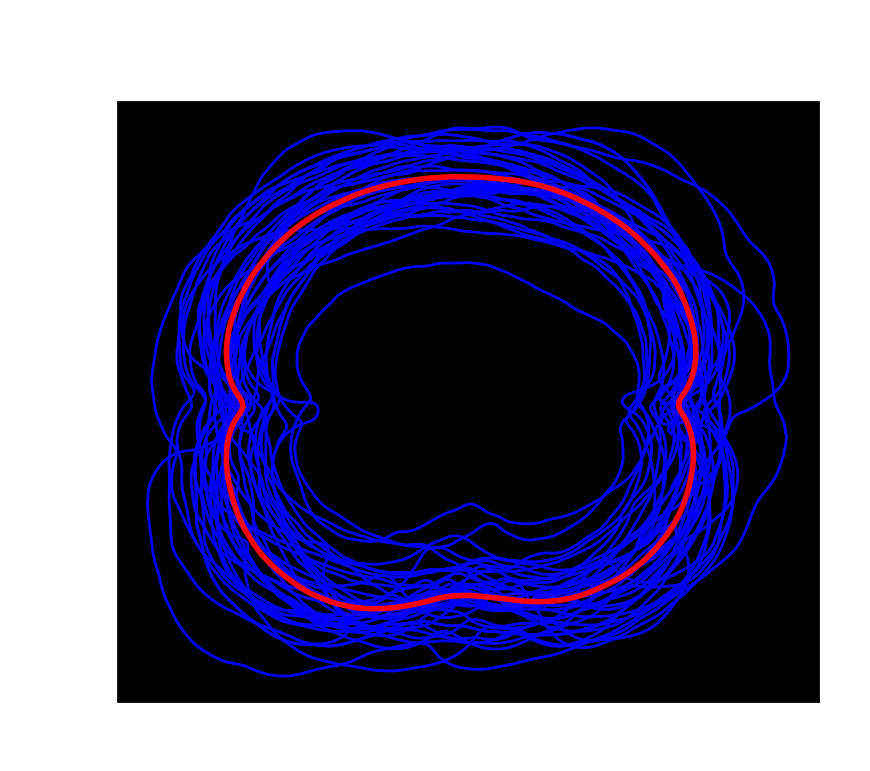

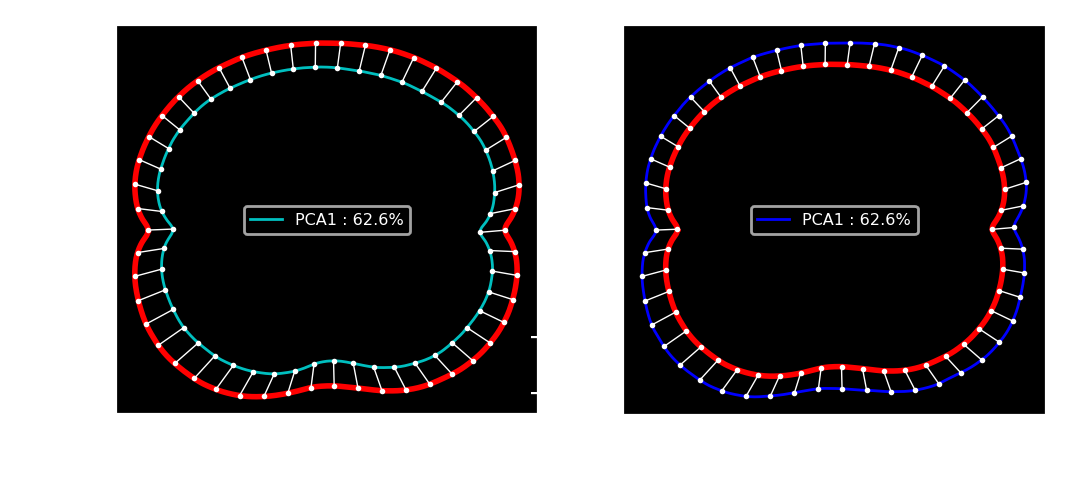

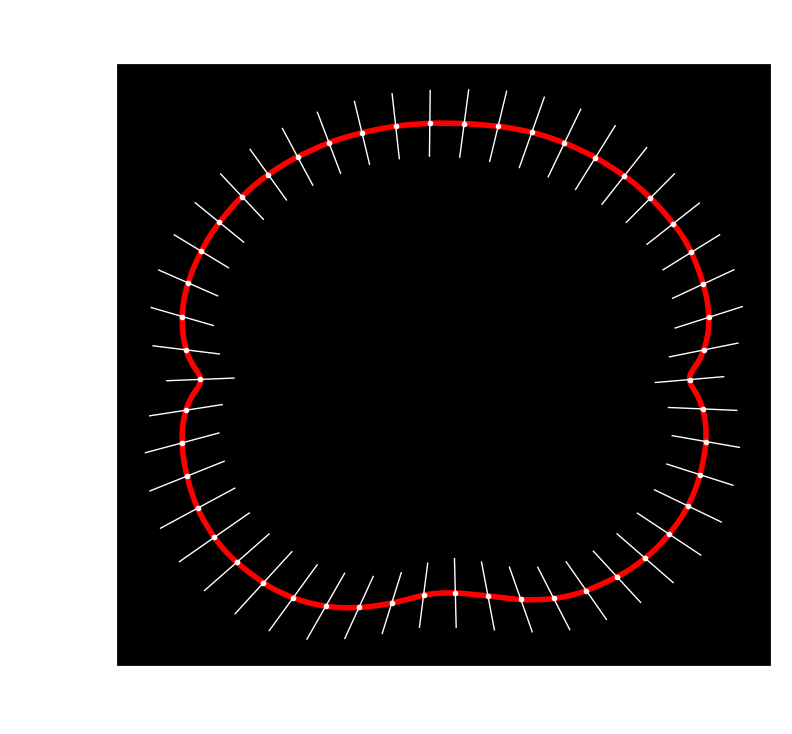

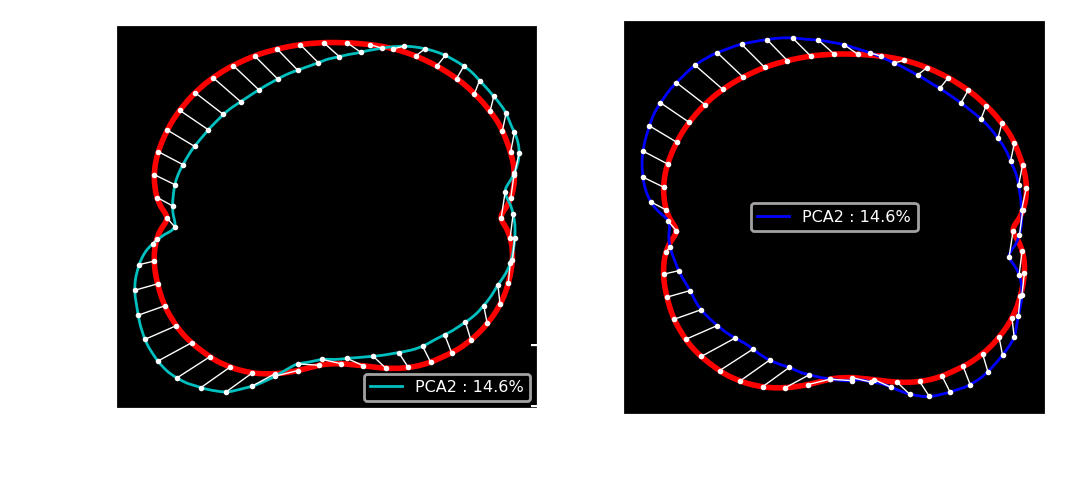

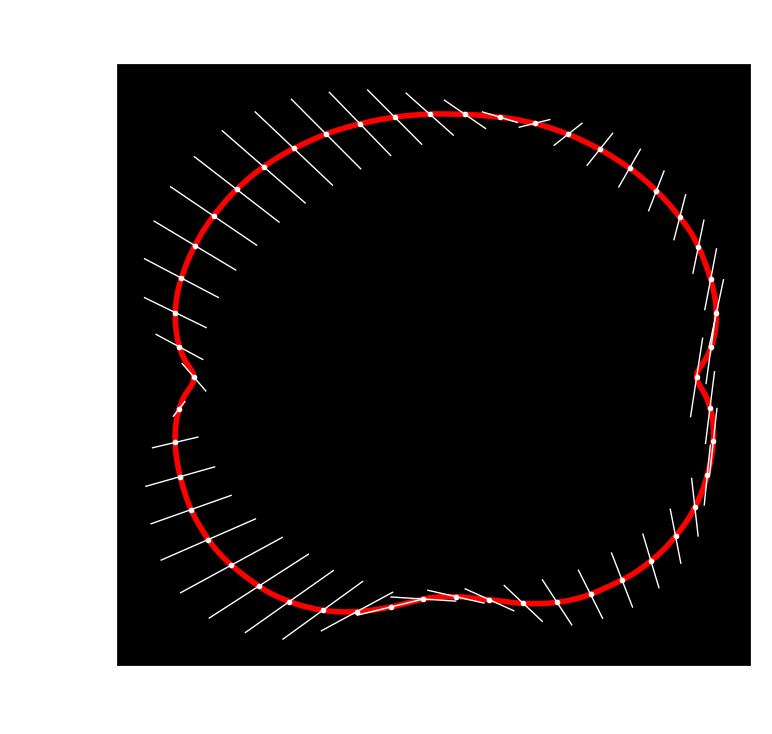

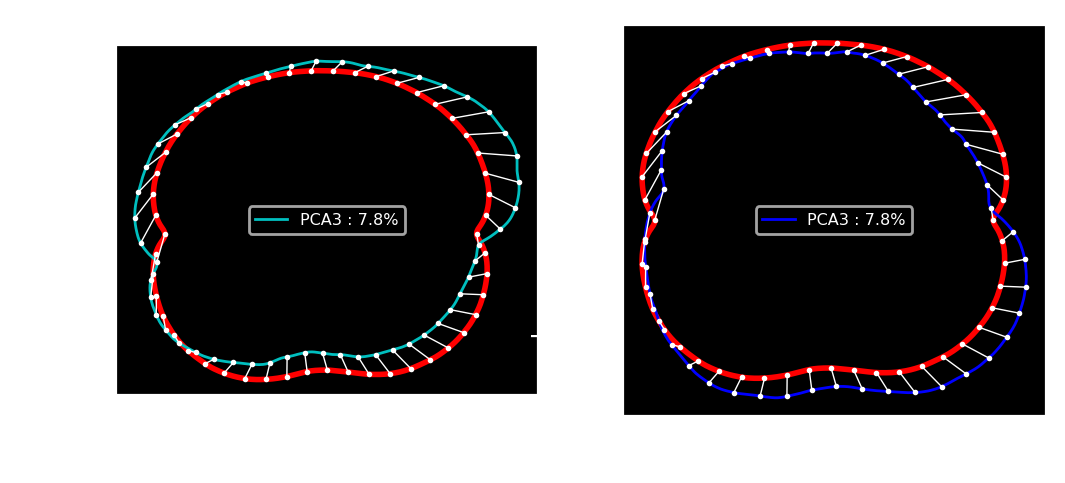

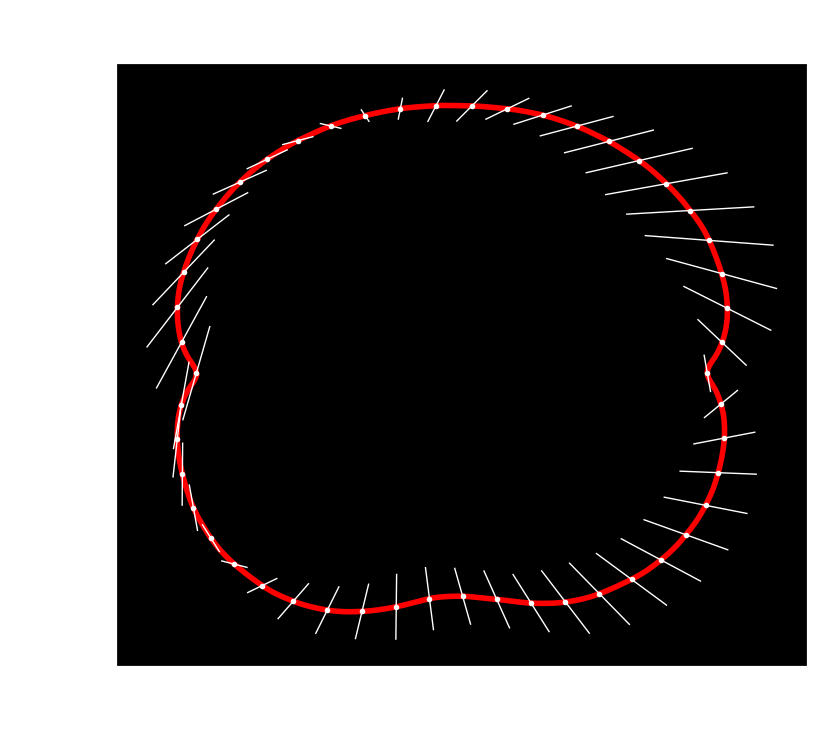

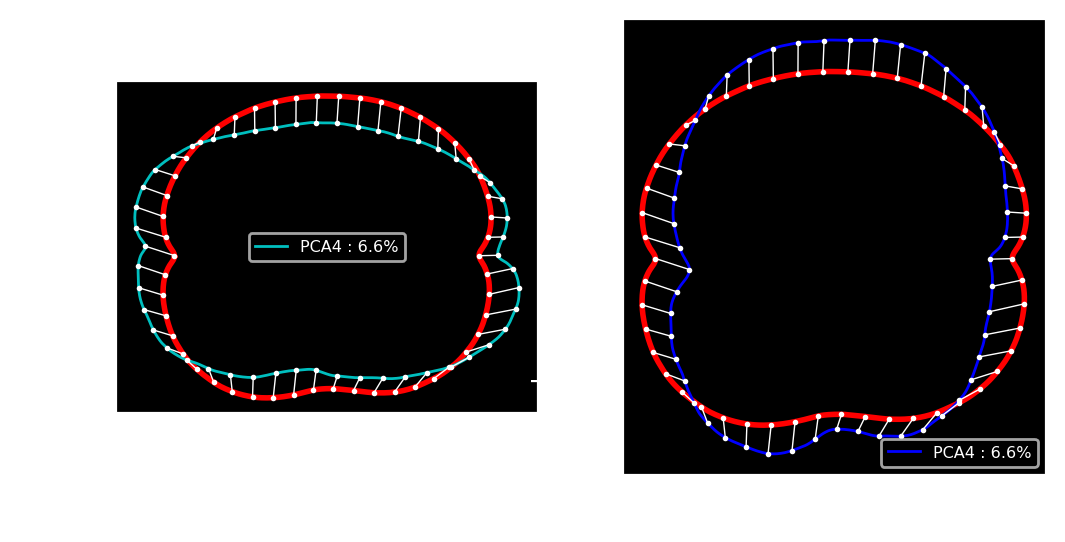

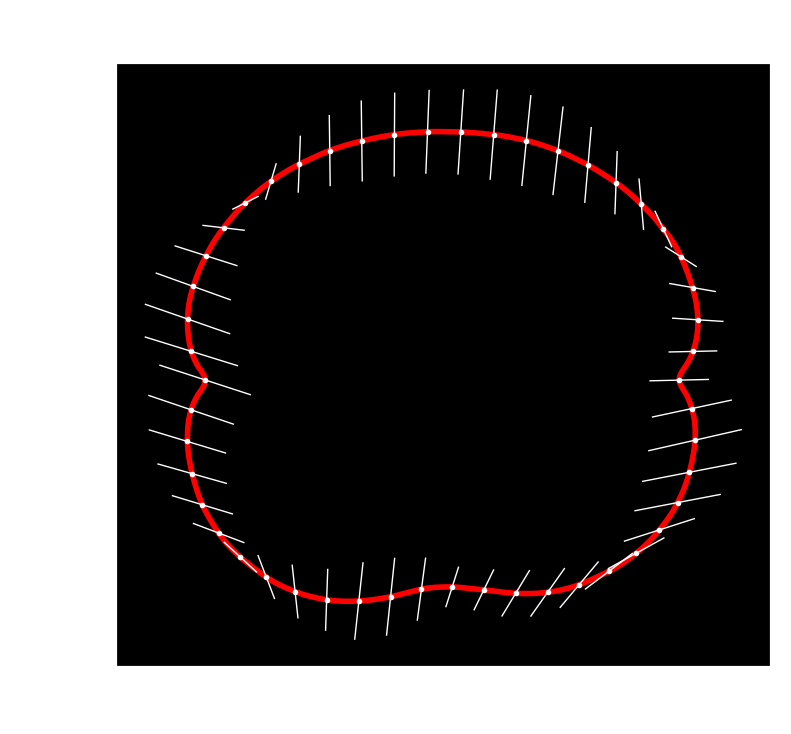

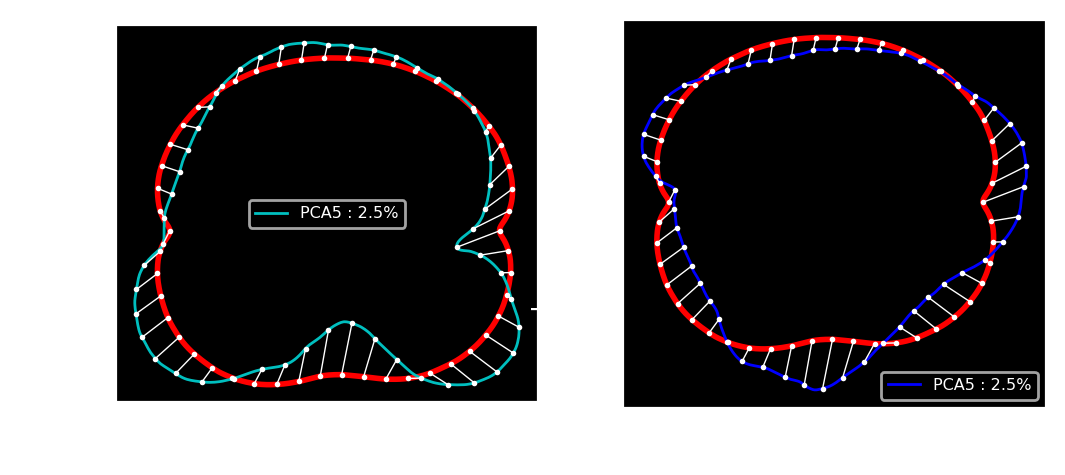

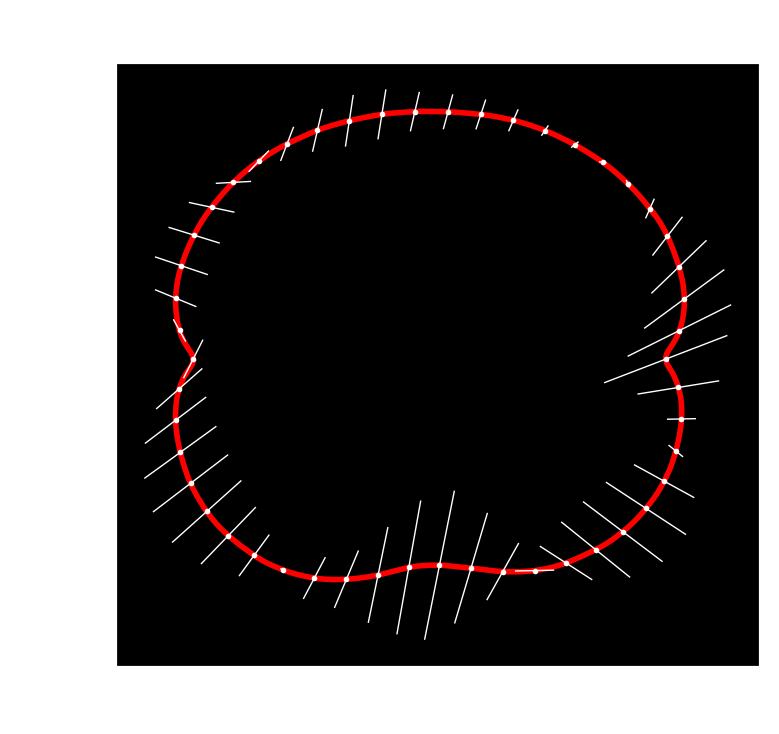

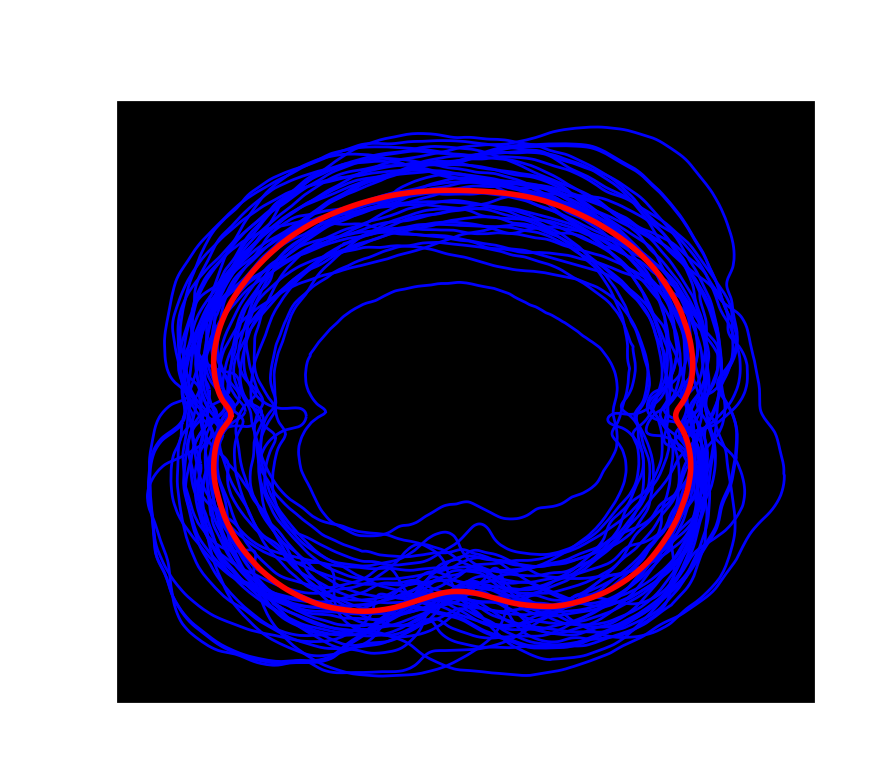

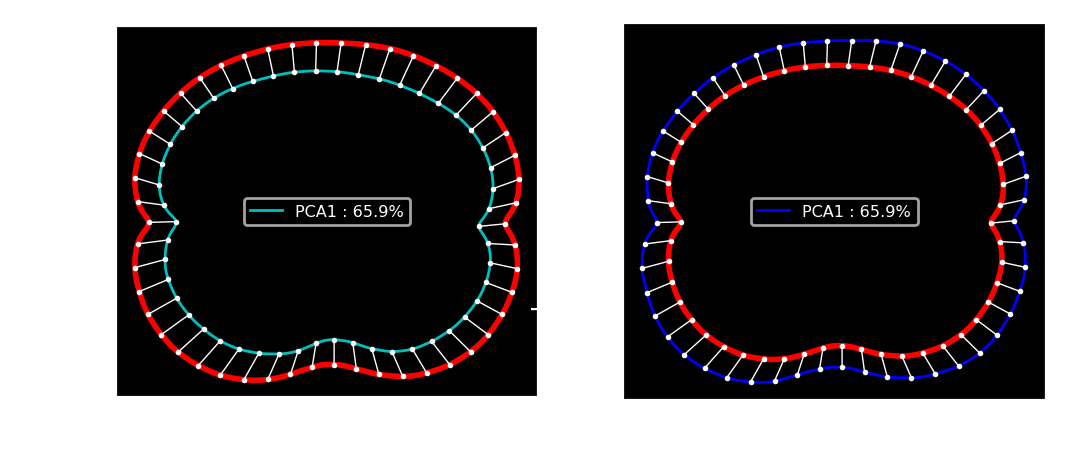

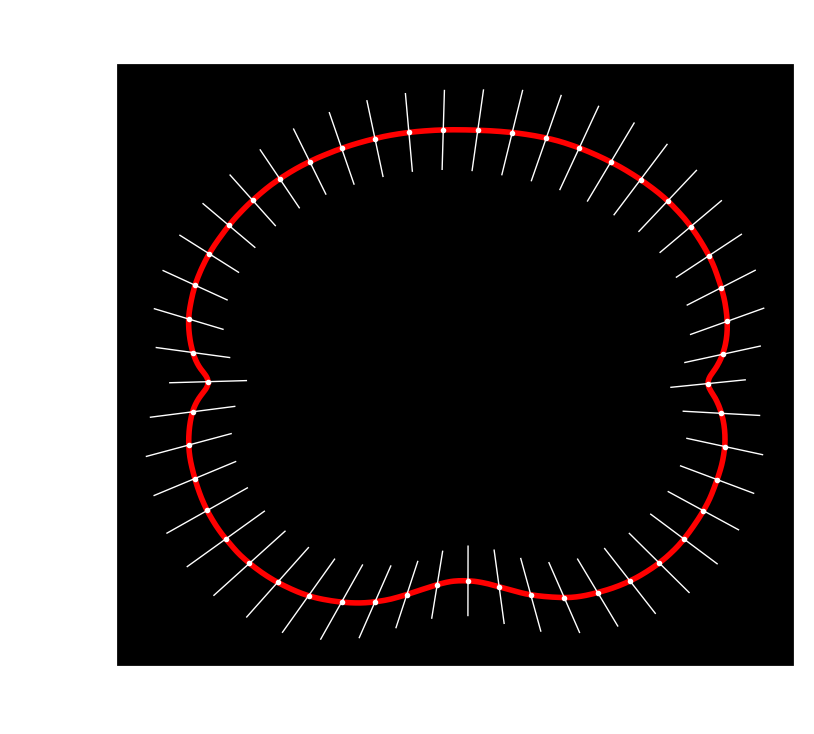

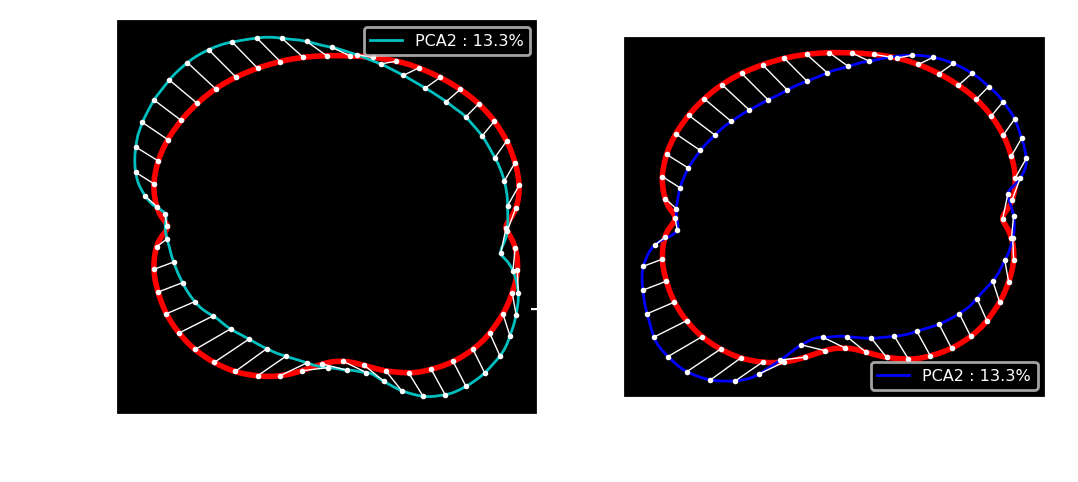

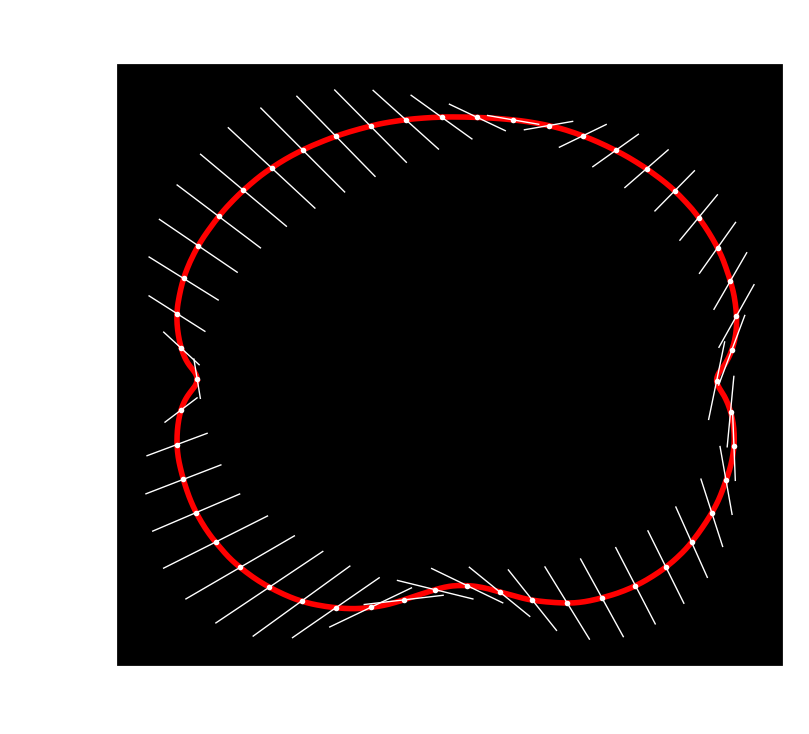

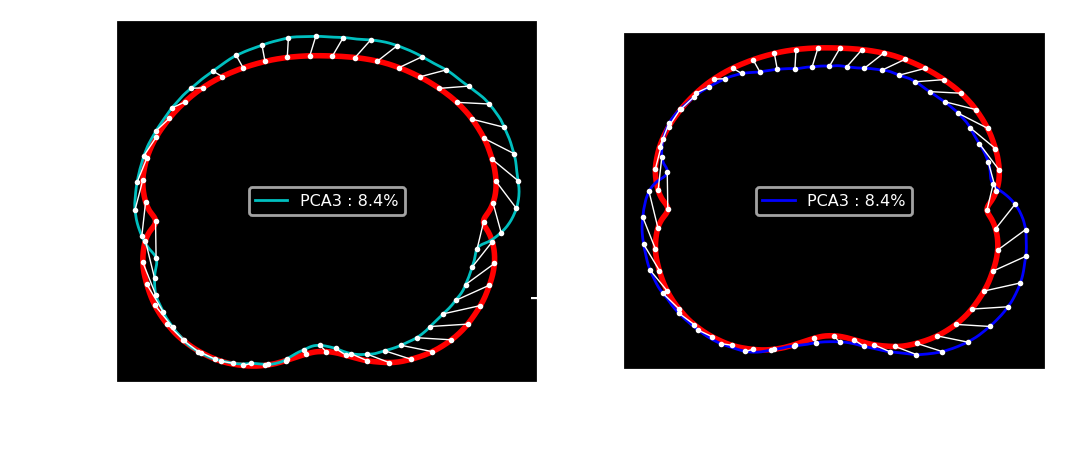

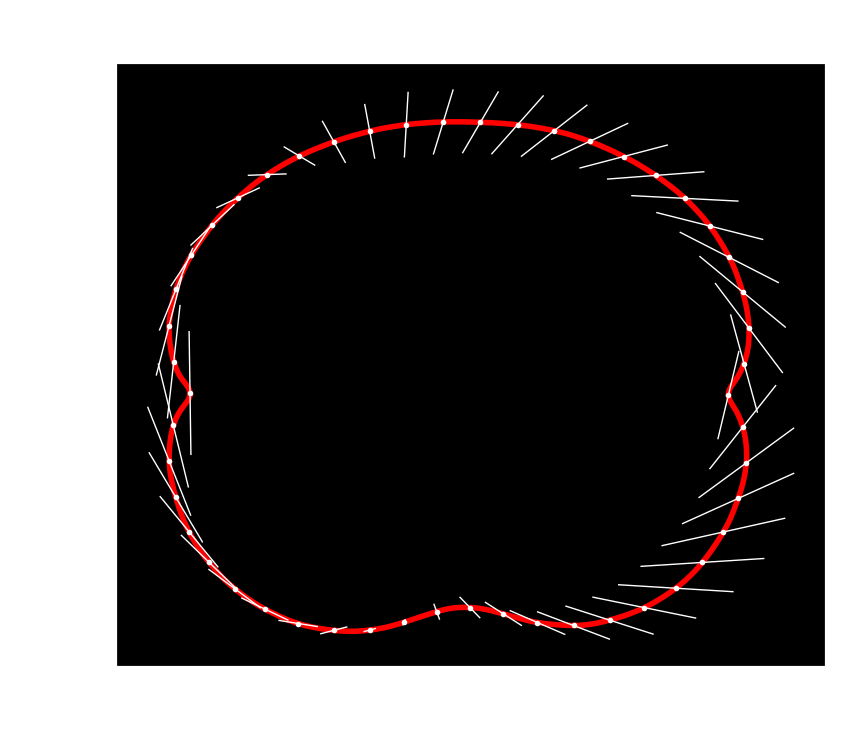

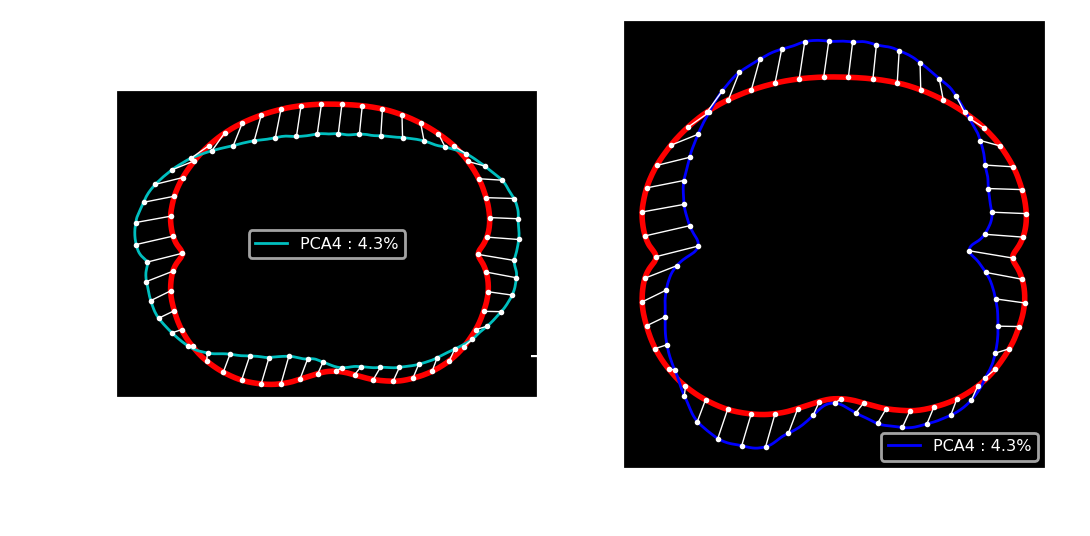

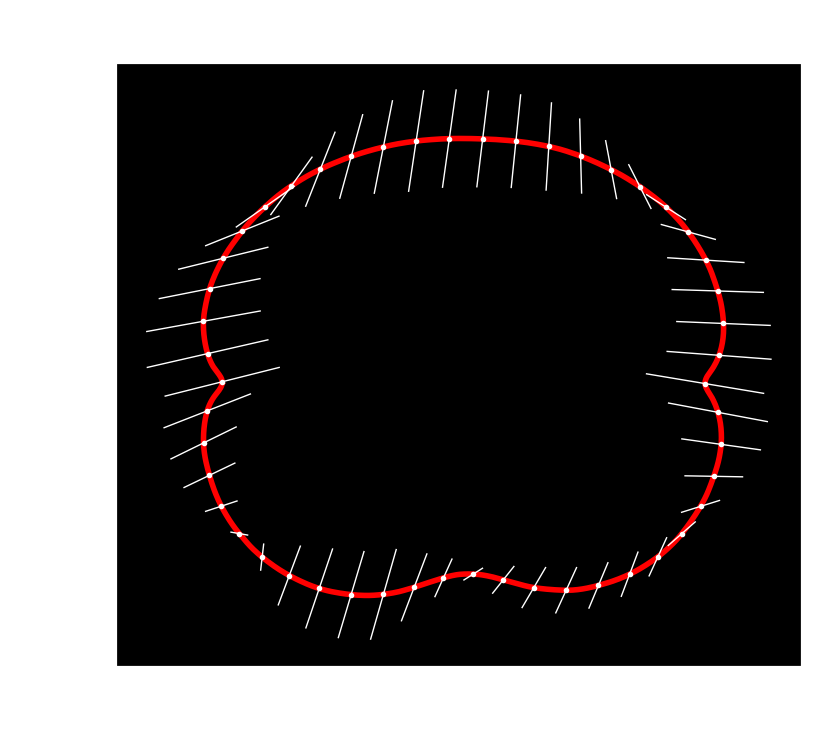

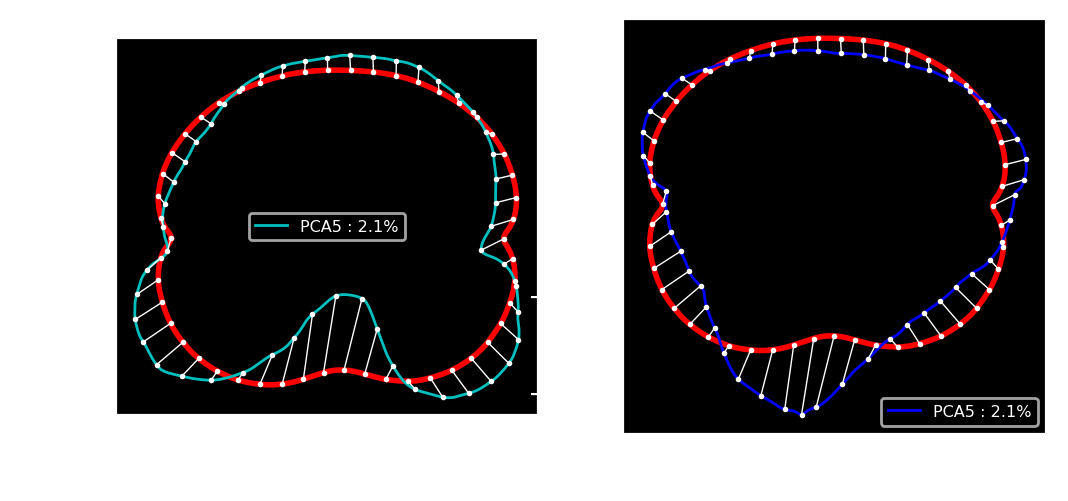

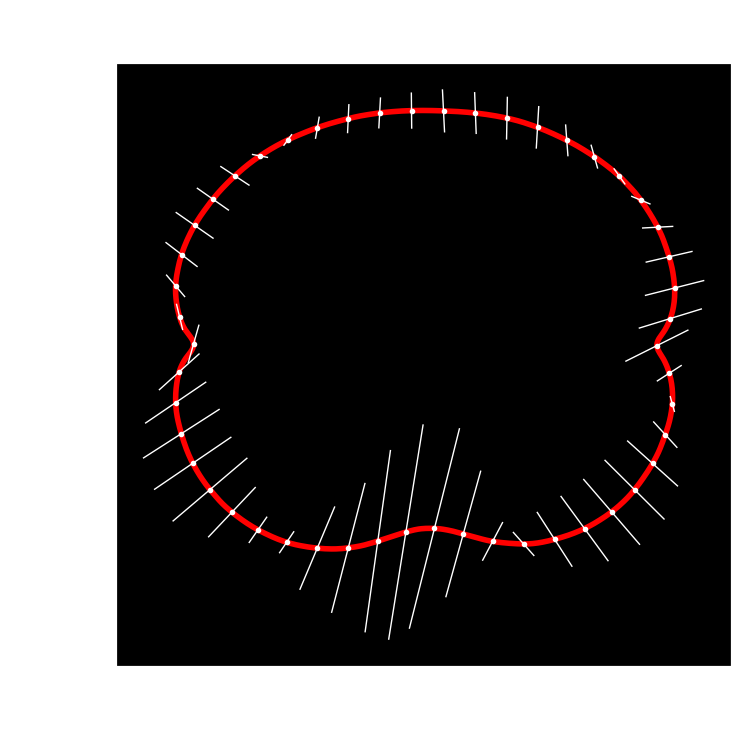

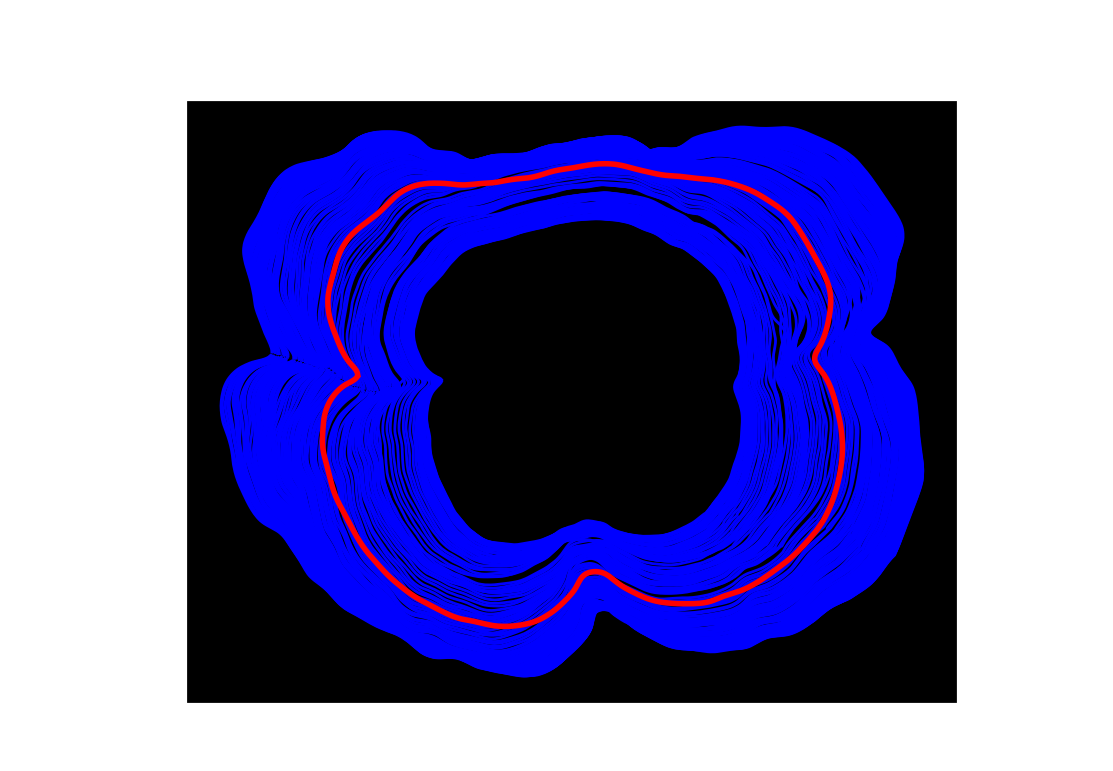

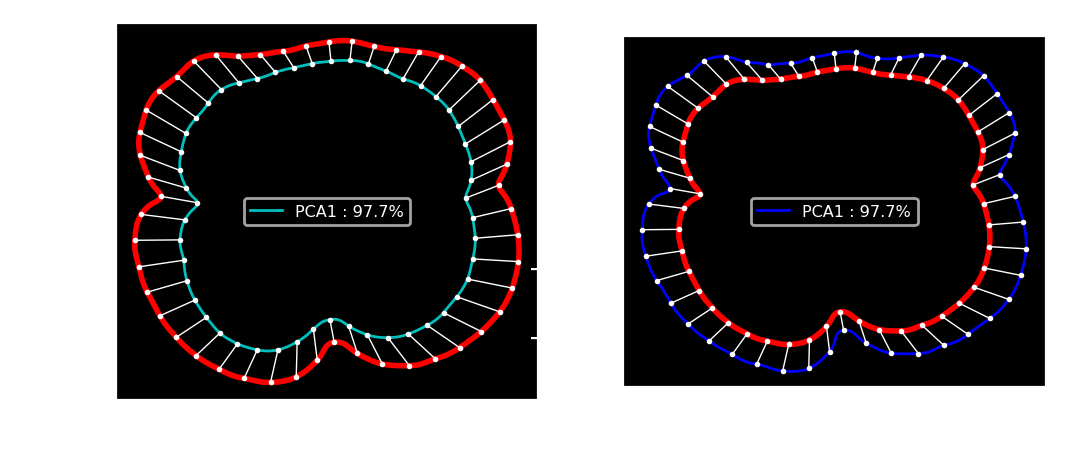

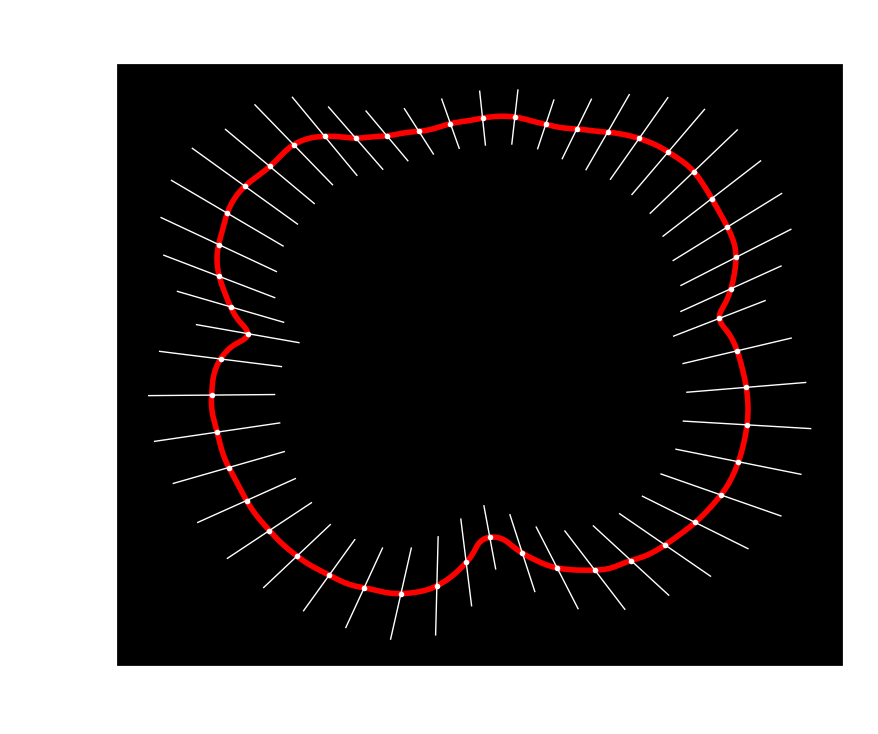

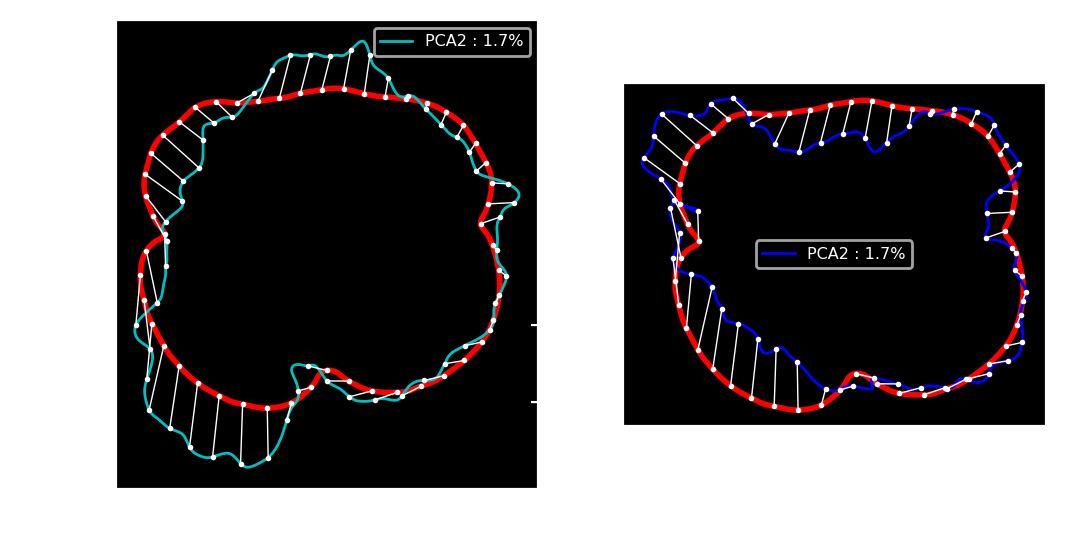

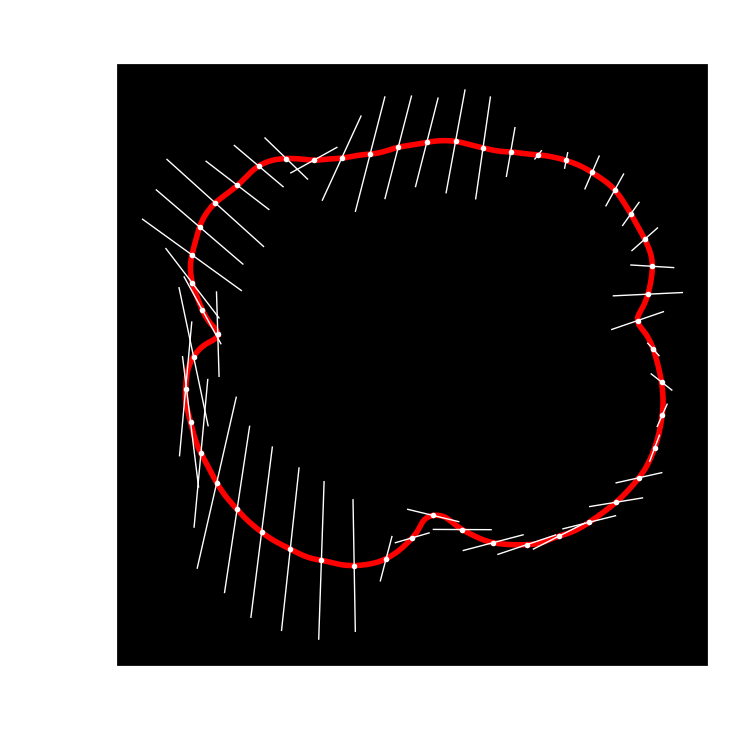

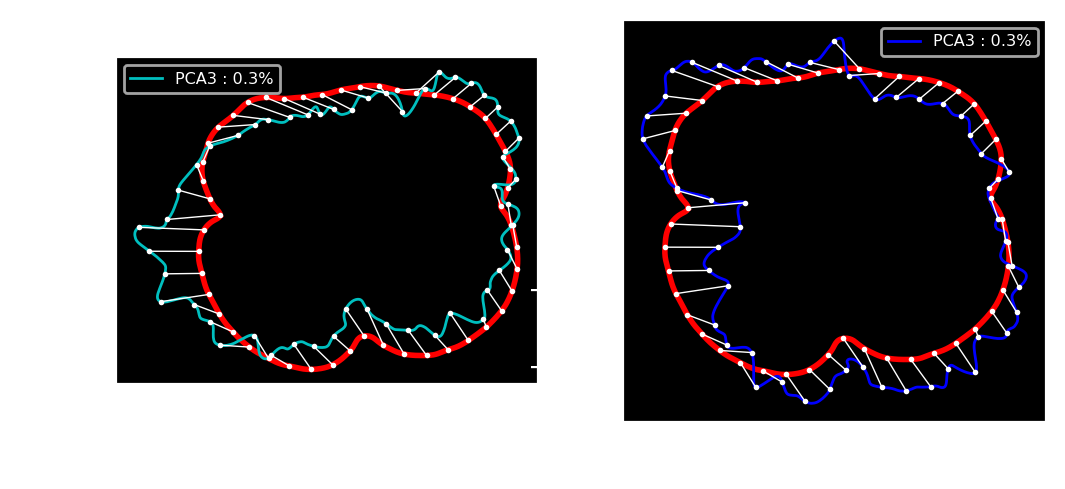

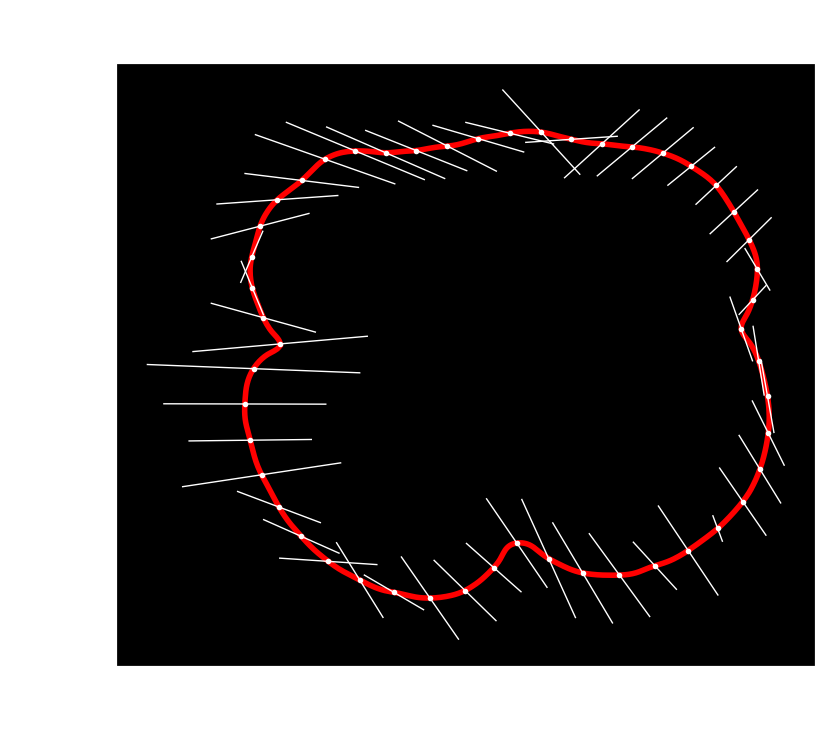

In [46]:
contourPCA(X0s,Y0s,5,'220531_Ct1_T0')

contourPCA(X30s,Y30s,5,'220531_Ct1_T30')

contourPCA(Xts,Yts,3,'220531_Ct1_overTime_lastPPG')